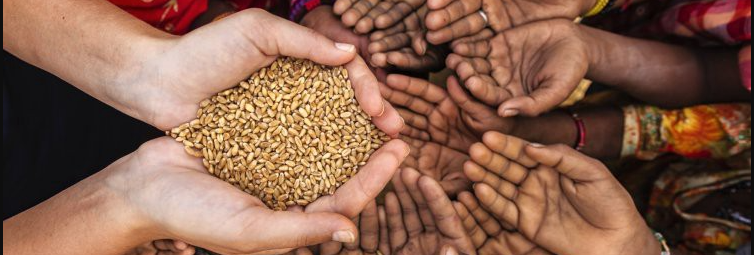

# <center> Predicting Food Insecurity in ASEAN countries </center>

### **Group 8**<br>
**Group member:**<br>
- SUET LING KU (S2133418)
- JENIFER MAYANG JUES (S2016572)
- RADZIAH ZAINUDDIN (S2156690)
- YINGGANG JIE (S2113868)
- RUIXUE ZHANG (S2142119)

## Overview
- Food insecurity (FI) is defined as the state of being without secure access to sufficient quantity of affordable nutritious food that sustains an active and healthy lifestyle. 

- FI could lead the to disruption of food intake or change in eating patterns due to various reasons such as lack of available foods and unaffordable food prices.

- FI can be measured by the prevalence of food insecurity and the prevalence of undernourishment in a population. 
 
- The global food crisis in 2007 shows that food insecurity could lead to hunger crisis, political instability and riots. Therefore, ASEAN countries must implement a robust food security response to ensure all 4 pillars of food security indicators are maintained. 

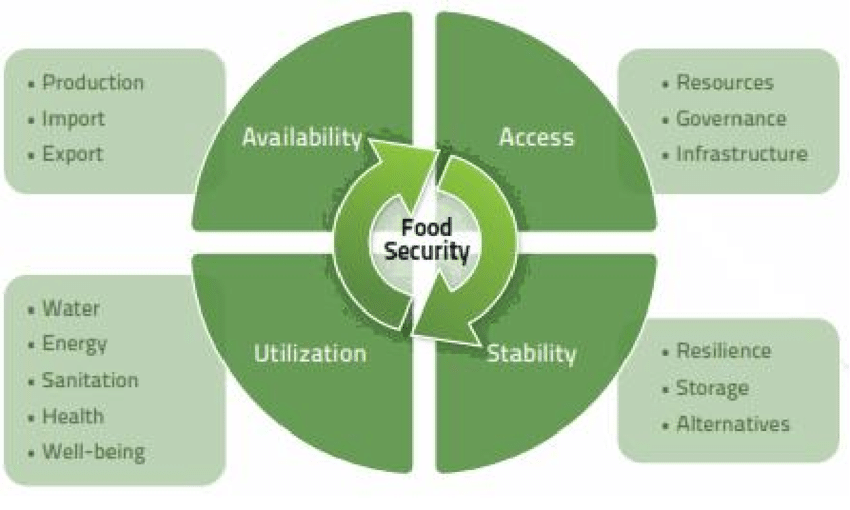

- The datasets we used in this project is obtained from the Food and Agriculture Organization (FAO) website and The World Bank. 

## Initial Questions
- What are the factors that contributes to the food insecurity in ASEAN countries? 
- What countries that are most vulnerable to food insecurity risk? 
- What are the relationship between food insecurity prevalence and other factors such as population size, food production and food prices? 
- Which regression model is the best to predict prevalence of severe food insecurity in the total population (percent) (3-year average) (%) each ASEAN country?  

## Motivation
 
- To establish an early warning system to inform policy makers. 
- To provide insights for objective decision-making for governments to supply adequate and nutritious food for the affected populations.
- To strengthen food security system in the ASEAN region. 

## Problem Statement

- Household surveys are mainly used to measure food security dimensions which require substantial manpower, time and budget


## Data Mining Goal

- To develop a model to predict the food insecurity in ASEAN countries.
- To determine the best regression model to predict the food insecurity in ASEAN countries using various regression models. 


## Related work

According to International Strategy Institute (ISI), food crisis may hit Malaysia due to the COVID-19 pandemic because a lot of countries have imposed lockdown and this has impacted the import and export activities. Malaysia depends a lot on commodity imports such as from Australia, India, Vietnam and Thailand.
Reference link: https://www.thesundaily.my/local/food-crisis-may-hit-malaysia-says-isi-IN2395219

With the restrictions and border closure in all countries during the pandemic has disrupted local food supply chain and increased shipping costs. This has directly impacted the increasing of food price. Other external factors such as climate change, catastrophies, pest infestations and spread of infectious diseases. A rising of food inflation also has been observed between 2019 to 2020. Additionally, the pandemic has caused tremendous surge in unemployment rate which reduced total work hours and significantly decreased a total of household income. With the relation of high food price and low income, the access to healthy and nourishing food are affected and in turn affects prevalence of undernourishment.
Reference link: https://www.adb.org/news/features/food-inflation-food-nutrition-security-situation-developing-asia-covid-19-pandemic

Malaysia is going to be affected by the inflation post pandemic and it has been recorded by Malaysia Department of Statistics in which inflation rate in this country has increased 3.2% in December 2021 due to increasing price of food and fuels.
Reference link: https://www.cnbc.com/2022/01/28/malaysia-is-taking-steps-to-control-rising-food-prices-says-minister.html




## Data Cleaning / Preprocessing


## Part 1: Reshape and merge datasets

In this part, we will tidy the form of three raw datasets, and finally merge them into one dataset.

### 1.1  Reshape Food Security Indicators dataset

***Import libraries and read dataset***

In [1]:
import numpy as np
import pandas as pd
df1=pd.read_csv('ASEAN Food Security Indicators.csv')
df1.head()

Domain Code                             Domain  Area Code (FAO)  \
0          FS  Suite of Food Security Indicators               26   
1          FS  Suite of Food Security Indicators               26   
2          FS  Suite of Food Security Indicators               26   
3          FS  Suite of Food Security Indicators               26   
4          FS  Suite of Food Security Indicators               26   

                Area  Element Code Element  Item Code  \
0  Brunei Darussalam          6121   Value      21010   
1  Brunei Darussalam          6121   Value      21010   
2  Brunei Darussalam          6121   Value      21010   
3  Brunei Darussalam          6121   Value      21010   
4  Brunei Darussalam          6121   Value      21010   

                                                Item  Year Code       Year  \
0  Average dietary energy supply adequacy (percen...   20002002  2000-2002   
1  Average dietary energy supply adequacy (percen...   20012003  2001-2003   
2  Average dietary energy supply adequacy (percen...   20022004  2002-2004   
3  Average dietary energy supply adequacy (percen...   20032005  2003-2005   
4  Average dietary energy supply adequacy (percen...   20042006  2004-2006   

  Unit  Value Flag Flag Description  Note  
0    %  123.0    F     FAO estimate   NaN  
1    %  125.0    F     FAO estimate   NaN  
2    %  127.0    F     FAO estimate   NaN  
3    %  127.0    F     FAO estimate   NaN  
4    %  127.0    F     FAO estimate   NaN

***Drop useless or duplicated columns***

In [2]:
df1=df1.drop(['Domain Code', 'Domain','Area Code (FAO)', 'Year Code','Element Code','Element',
            'Item Code','Unit', 'Flag',
              'Flag Description','Note'], axis=1)
df1.head()

Area                                               Item  \
0  Brunei Darussalam  Average dietary energy supply adequacy (percen...   
1  Brunei Darussalam  Average dietary energy supply adequacy (percen...   
2  Brunei Darussalam  Average dietary energy supply adequacy (percen...   
3  Brunei Darussalam  Average dietary energy supply adequacy (percen...   
4  Brunei Darussalam  Average dietary energy supply adequacy (percen...   

        Year  Value  
0  2000-2002  123.0  
1  2001-2003  125.0  
2  2002-2004  127.0  
3  2003-2005  127.0  
4  2004-2006  127.0

***Formatting columns***

In [3]:
# Formatting 'Year' column
for i in range(len(df1)):
    if len(df1.iloc[i,2])==9:
        df1.iloc[i,2]=int((int(df1.iloc[i,2][0:4])+int(df1.iloc[i,2][5:]))/2)
    elif len(df1.iloc[i,2])==4:
        df1.iloc[i,2]=int(df1.iloc[i,2])
    else:
        print('There is an error in Year column')
# Formatting 'Value' column
df1.fillna(0,inplace=True)
df1['Value'] = df1.Value.apply(str)
index = df1[df1['Value'].str.contains('<'or'>')].index
for i in index:
    df1.iloc[i,3] = df1.iloc[i,3][1:]
    pass
df1['Value'] = pd.to_numeric(df1['Value'], downcast='float')
for i in range(np.shape(df1)[0]):
    for j in range(np.shape(df1)[1]):
        if df1.iloc[i,j] == 0:
            df1.iloc[i,j] = float('NaN')
df1.head()

Area                                               Item  Year  \
0  Brunei Darussalam  Average dietary energy supply adequacy (percen...  2001   
1  Brunei Darussalam  Average dietary energy supply adequacy (percen...  2002   
2  Brunei Darussalam  Average dietary energy supply adequacy (percen...  2003   
3  Brunei Darussalam  Average dietary energy supply adequacy (percen...  2004   
4  Brunei Darussalam  Average dietary energy supply adequacy (percen...  2005   

   Value  
0  123.0  
1  125.0  
2  127.0  
3  127.0  
4  127.0

***Reshape dataframe organized by Item***

In [4]:
from pandas import pivot
df1=df1.pivot_table(index=['Area','Year'],columns='Item',values='Value')
df1=df1.reset_index()
df1.head()

Item               Area  Year  \
0     Brunei Darussalam  2000   
1     Brunei Darussalam  2001   
2     Brunei Darussalam  2002   
3     Brunei Darussalam  2003   
4     Brunei Darussalam  2004   

Item  Average dietary energy supply adequacy (percent) (3-year average)  \
0                                                   NaN                   
1                                                 123.0                   
2                                                 125.0                   
3                                                 127.0                   
4                                                 127.0                   

Item  Average protein supply (g/cap/day) (3-year average)  \
0                                                   NaN     
1                                             87.400002     
2                                             89.699997     
3                                             90.300003     
4                                             88.599998     

Item  Average supply of protein of animal origin (g/cap/day) (3-year average)  \
0                                                   NaN                         
1                                             45.400002                         
2                                             47.700001                         
3                                             48.299999                         
4                                             47.299999                         

Item  Average value of food production (constant 2004-2006 I$/cap) (3-year average)  \
0                                                   NaN                               
1                                                  81.0                               
2                                                  85.0                               
3                                                  86.0                               
4                                                  76.0                               

Item  Cereal import dependency ratio (percent) (3-year average)  \
0                                                   NaN           
1                                            100.000000           
2                                             99.599998           
3                                             95.699997           
4                                             93.800003           

Item  Gross domestic product per capita, PPP, dissemination (constant 2011 international $)  \
0                                          69022.898438                                       
1                                          69483.898438                                       
2                                          70771.601562                                       
3                                          71483.203125                                       
4                                          70616.601562                                       

Item  Per capita food production variability (constant 2004-2006 thousand int$ per capita)  \
0                                                   NaN                                      
1                                                   7.5                                      
2                                                   6.9                                      
3                                                   6.7                                      
4                                                   4.2                                      

Item  Per capita food supply variability (kcal/cap/day)  \
0                                                  51.0   
1                                                  63.0   
2                                                  31.0   
3                                                  40.0   
4                                                  59.0   

Item  Percent of arable land equipped for irrigation (percent) (3-year average)

### 1.2 Reshape Consumer Price indices dataset

***Read dataset***

In [5]:
df2=pd.read_csv('ASEAN Consumer Price Indices.csv')
df2.head()

Domain Code                  Domain  Area Code (M49)               Area  \
0          CP  Consumer Price Indices               96  Brunei Darussalam   
1          CP  Consumer Price Indices               96  Brunei Darussalam   
2          CP  Consumer Price Indices               96  Brunei Darussalam   
3          CP  Consumer Price Indices               96  Brunei Darussalam   
4          CP  Consumer Price Indices               96  Brunei Darussalam   

   Year Code  Year  Item Code                                        Item  \
0       2000  2000      23013  Consumer Prices, Food Indices (2015 = 100)   
1       2001  2001      23013  Consumer Prices, Food Indices (2015 = 100)   
2       2002  2002      23013  Consumer Prices, Food Indices (2015 = 100)   
3       2003  2003      23013  Consumer Prices, Food Indices (2015 = 100)   
4       2004  2004      23013  Consumer Prices, Food Indices (2015 = 100)   

   Months Code   Months Unit      Value Flag Flag Description  \
0         7001  January  NaN  88.959933    F     FAO estimate   
1         7001  January  NaN  89.702503    F     FAO estimate   
2         7001  January  NaN  90.146512    F     FAO estimate   
3         7001  January  NaN  90.365320    F     FAO estimate   
4         7001  January  NaN  89.822766    F     FAO estimate   

                Note  
0  base year is 2015  
1  base year is 2015  
2  base year is 2015  
3  base year is 2015  
4  base year is 2015

***Drop useless or duplicated variables***

In [6]:
df2=df2.drop(['Domain Code', 'Domain','Area Code (M49)', 'Year Code',
            'Item Code','Months Code', 'Flag',
              'Flag Description','Note','Unit'], axis=1)
df2.head()

Area  Year                                        Item  \
0  Brunei Darussalam  2000  Consumer Prices, Food Indices (2015 = 100)   
1  Brunei Darussalam  2001  Consumer Prices, Food Indices (2015 = 100)   
2  Brunei Darussalam  2002  Consumer Prices, Food Indices (2015 = 100)   
3  Brunei Darussalam  2003  Consumer Prices, Food Indices (2015 = 100)   
4  Brunei Darussalam  2004  Consumer Prices, Food Indices (2015 = 100)   

    Months      Value  
0  January  88.959933  
1  January  89.702503  
2  January  90.146512  
3  January  90.365320  
4  January  89.822766

In [7]:
# split 'Months' column into separate columns
from pandas import pivot
df2=df2.pivot_table(index=['Area','Year','Item'],columns='Months',values='Value')
df2=df2.reset_index()
df2.head()

Months               Area  Year  \
0       Brunei Darussalam  2000   
1       Brunei Darussalam  2000   
2       Brunei Darussalam  2001   
3       Brunei Darussalam  2001   
4       Brunei Darussalam  2001   

Months                                           Item      April     August  \
0          Consumer Prices, Food Indices (2015 = 100)  89.152073  89.408259   
1       Consumer Prices, General Indices (2015 = 100)  94.856250  95.560047   
2          Consumer Prices, Food Indices (2015 = 100)  89.816677  89.968908   
3       Consumer Prices, General Indices (2015 = 100)  96.185645  96.263845   
4                                Food price inflation   0.745472   0.627067   

Months   December   February    January       July       June      March  \
0       89.664445  89.023980  88.959933  89.344212  89.280166  89.088026   
1       95.560047  94.465251  94.230652  95.325448  95.247248  94.778050   
2       90.121140  89.740561  89.702503  89.930850  89.892793  89.778619   
3       92.588458  95.951046  95.872846  96.263845  96.263845  96.029246   
4        0.509338   0.804931   0.834724   0.656604   0.686185   0.775180   

Months        May   November    October  September  
0       89.216119  89.600398  89.536352  89.472305  
1       94.856250  95.403648  95.794646  95.638247  
2       89.854735  90.083082  90.045024  90.006966  
3       96.185645  94.074253  96.420244  96.420244  
4        0.715807   0.538707   0.568118   0.597571

In [8]:
# impute na using mean method
df2_1=df2.iloc[:,3:15]
a1=np.where(np.isnan(df2_1))[0]
a2=np.where(np.isnan(df2_1))[1]
for i in a1:
    for j in a2:
        df2_1.iloc[i,j]=df2_1.iloc[i].mean()

In [9]:
# add new column by mean value of months
df2['Value']=df2_1.apply(lambda x: x.mean(),axis=1)

In [10]:
# drop months columns
df2=df2.drop(['January','February','March','April','May','June','July','August','September','October','November','December'], axis=1)
df2.head()

Months               Area  Year  \
0       Brunei Darussalam  2000   
1       Brunei Darussalam  2000   
2       Brunei Darussalam  2001   
3       Brunei Darussalam  2001   
4       Brunei Darussalam  2001   

Months                                           Item      Value  
0          Consumer Prices, Food Indices (2015 = 100)  89.312189  
1       Consumer Prices, General Indices (2015 = 100)  95.142982  
2          Consumer Prices, Food Indices (2015 = 100)  89.911821  
3       Consumer Prices, General Indices (2015 = 100)  95.709930  
4                                Food price inflation   0.671642

***Reshape dataframe organized by Item***

In [11]:
# split the 'Item' column into Food Indices, General Indices, and inflation rates
df2=df2.pivot_table(index=['Area','Year'],columns='Item',values='Value')
df2=df2.reset_index()
df2.head()

Item               Area  Year  Consumer Prices, Food Indices (2015 = 100)  \
0     Brunei Darussalam  2000                                   89.312189   
1     Brunei Darussalam  2001                                   89.911821   
2     Brunei Darussalam  2002                                   90.286058   
3     Brunei Darussalam  2003                                   90.033759   
4     Brunei Darussalam  2004                                   90.485887   

Item  Consumer Prices, General Indices (2015 = 100)  Food price inflation  
0                                         95.142982                   NaN  
1                                         95.709930              0.671642  
2                                         93.494272              0.416298  
3                                         93.743590             -0.279126  
4                                         94.530500              0.503782

### 1.3 Select needed data from World Population dataset

***Read dataset***

In [12]:
url = 'https://github.com/Ruixue-Zhang/Data-Analytics-group-assignment/raw/main/cleaning/raw%20data/World%20Population%20-%20World%20Bank.csv'
df3 = pd.read_csv(url, skiprows=[0,1,2,3])
df3.head()  

Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54208.0      55434.0      56234.0      56699.0      57029.0   
1  130836765.0  134159786.0  137614644.0  141202036.0  144920186.0   
2    8996967.0    9169406.0    9351442.0    9543200.0    9744772.0   
3   96396419.0   98407221.0  100506960.0  102691339.0  104953470.0   
4    5454938.0    5531451.0    5608499.0    5679409.0    5734995.0   

          1965  ...         2013         2014         2015         2016  \
0      57357.0  ...     103165.0     103776.0     104339.0     104865.0   
1  148769974.0  ...  562601578.0  578075373.0  593871847.0  609978946.0   
2    9956318.0  ...   32269592.0   33370804.0   34413603.0   35383028.0   
3  107289875.0  ...  380437896.0  390882979.0  401586651.0  412551299.0   
4    5770573.0  ...   26015786.0   26941773.0   27884380.0   28842482.0   

          2017         2018         2019         2020  2021  Unnamed: 66  
0     105361.0     105846.0     106310.0     106766.0   NaN          NaN  
1  626392880.0  643090131.0  660046272.0  677243299.0   NaN          NaN  
2   36296111.0   37171922.0   38041757.0   38928341.0   NaN          NaN  
3  423769930.0  435229381.0  446911598.0  458803476.0   NaN          NaN  
4   29816769.0   30809787.0   31825299.0   32866268.0   NaN          NaN  

[5 rows x 67 columns]

***Drop columns***

In [13]:
df3 = df3.drop(['Country Code', 'Indicator Name', 'Indicator Code','2021','Unnamed: 66'], axis = 1)
df3.head()

Country Name         1960         1961         1962  \
0                        Aruba      54208.0      55434.0      56234.0   
1  Africa Eastern and Southern  130836765.0  134159786.0  137614644.0   
2                  Afghanistan    8996967.0    9169406.0    9351442.0   
3   Africa Western and Central   96396419.0   98407221.0  100506960.0   
4                       Angola    5454938.0    5531451.0    5608499.0   

          1963         1964         1965         1966         1967  \
0      56699.0      57029.0      57357.0      57702.0      58044.0   
1  141202036.0  144920186.0  148769974.0  152752671.0  156876454.0   
2    9543200.0    9744772.0    9956318.0   10174840.0   10399936.0   
3  102691339.0  104953470.0  107289875.0  109701811.0  112195950.0   
4    5679409.0    5734995.0    5770573.0    5781305.0    5774440.0   

          1968  ...         2011         2012         2013         2014  \
0      58377.0  ...     102050.0     102565.0     103165.0     103776.0   
1  161156430.0  ...  532760424.0  547482863.0  562601578.0  578075373.0   
2   10637064.0  ...   30117411.0   31161378.0   32269592.0   33370804.0   
3  114781116.0  ...  360285439.0  370243017.0  380437896.0  390882979.0   
4    5771973.0  ...   24220660.0   25107925.0   26015786.0   26941773.0   

          2015         2016         2017         2018         2019  \
0     104339.0     104865.0     105361.0     105846.0     106310.0   
1  593871847.0  609978946.0  626392880.0  643090131.0  660046272.0   
2   34413603.0   35383028.0   36296111.0   37171922.0   38041757.0   
3  401586651.0  412551299.0  423769930.0  435229381.0  446911598.0   
4   27884380.0   28842482.0   29816769.0   30809787.0   31825299.0   

          2020  
0     106766.0  
1  677243299.0  
2   38928341.0  
3  458803476.0  
4   32866268.0  

[5 rows x 62 columns]

***Select year 2000 - 2020***

In [14]:
year = np.arange(2000,2021)
col = ['Country Name']
for i in year:
    col.append(str(i))
df3 = df3[col]
df3.head()

Country Name         2000         2001         2002  \
0                        Aruba      90866.0      92892.0      94992.0   
1  Africa Eastern and Southern  398113044.0  408522129.0  419223717.0   
2                  Afghanistan   20779957.0   21606992.0   22600774.0   
3   Africa Western and Central  267214544.0  274433894.0  281842480.0   
4                       Angola   16395477.0   16945753.0   17519418.0   

          2003         2004         2005         2006         2007  \
0      97016.0      98744.0     100028.0     100830.0     101226.0   
1  430246635.0  441630149.0  453404076.0  465581372.0  478166911.0   
2   23680871.0   24726689.0   25654274.0   26433058.0   27100542.0   
3  289469530.0  297353098.0  305520588.0  313985474.0  322741656.0   
4   18121477.0   18758138.0   19433604.0   20149905.0   20905360.0   

          2008  ...         2011         2012         2013         2014  \
0     101362.0  ...     102050.0     102565.0     103165.0     103776.0   
1  491173160.0  ...  532760424.0  547482863.0  562601578.0  578075373.0   
2   27722281.0  ...   30117411.0   31161378.0   32269592.0   33370804.0   
3  331772330.0  ...  360285439.0  370243017.0  380437896.0  390882979.0   
4   21695636.0  ...   24220660.0   25107925.0   26015786.0   26941773.0   

          2015         2016         2017         2018         2019  \
0     104339.0     104865.0     105361.0     105846.0     106310.0   
1  593871847.0  609978946.0  626392880.0  643090131.0  660046272.0   
2   34413603.0   35383028.0   36296111.0   37171922.0   38041757.0   
3  401586651.0  412551299.0  423769930.0  435229381.0  446911598.0   
4   27884380.0   28842482.0   29816769.0   30809787.0   31825299.0   

          2020  
0     106766.0  
1  677243299.0  
2   38928341.0  
3  458803476.0  
4   32866268.0  

[5 rows x 22 columns]

***Transpose dataset***

In [15]:
df3 = df3.set_index('Country Name').transpose()
df3 = df3.rename_axis('Year').reset_index()
df3.head()

Country Name  Year    Aruba  Africa Eastern and Southern  Afghanistan  \
0             2000  90866.0                  398113044.0   20779957.0   
1             2001  92892.0                  408522129.0   21606992.0   
2             2002  94992.0                  419223717.0   22600774.0   
3             2003  97016.0                  430246635.0   23680871.0   
4             2004  98744.0                  441630149.0   24726689.0   

Country Name  Africa Western and Central      Angola    Albania  Andorra  \
0                            267214544.0  16395477.0  3089027.0  65390.0   
1                            274433894.0  16945753.0  3060173.0  67344.0   
2                            281842480.0  17519418.0  3051010.0  70048.0   
3                            289469530.0  18121477.0  3039616.0  73180.0   
4                            297353098.0  18758138.0  3026939.0  76250.0   

Country Name   Arab World  United Arab Emirates  ...  Virgin Islands (U.S.)  \
0             282344141.0             3134067.0  ...               108642.0   
1             288432153.0             3302722.0  ...               108549.0   
2             294665202.0             3478769.0  ...               108509.0   
3             301113869.0             3711931.0  ...               108505.0   
4             307862846.0             4068577.0  ...               108466.0   

Country Name     Vietnam   Vanuatu         World     Samoa     Kosovo  \
0             79910411.0  184964.0  6.114324e+09  174454.0  1700000.0   
1             80742500.0  189209.0  6.193664e+09  175394.0  1701154.0   
2             81534406.0  193927.0  6.272724e+09  176410.0  1702310.0   
3             82301650.0  198960.0  6.351856e+09  177481.0  1703466.0   
4             83062819.0  204123.0  6.431527e+09  178597.0  1704622.0   

Country Name  Yemen, Rep.  South Africa      Zambia    Zimbabwe  
0              17409071.0    44967713.0  10415942.0  11881482.0  
1              17918369.0    45571272.0  10692197.0  11923906.0  
2              18443684.0    46150913.0  10971704.0  11954293.0  
3              18985001.0    46719203.0  11256740.0  11982219.0  
4              19540096.0    47291610.0  11550641.0  12019911.0  

[5 rows x 267 columns]

***Select certain country we need***

In [16]:
Area = ['Brunei Darussalam', 'Cambodia', 'Indonesia',
       'Lao PDR', 'Malaysia', 'Myanmar',
       'Philippines', 'Singapore', 'Thailand', 'Vietnam']
col=['Year']
for i in Area:
    col.append(i)
df3 = df3[col]

***Rename Areas for consistency***

In [17]:
df3.rename(columns = {'Lao PDR':"Lao People's Democratic Republic", 'Vietnam':'Viet Nam'}, inplace = True)
df3.head()

Country Name  Year  Brunei Darussalam    Cambodia    Indonesia  \
0             2000           333166.0  12155241.0  211513822.0   
1             2001           340037.0  12405411.0  214427419.0   
2             2002           346777.0  12637719.0  217357790.0   
3             2003           353295.0  12856171.0  220309473.0   
4             2004           359434.0  13066475.0  223285666.0   

Country Name  Lao People's Democratic Republic    Malaysia     Myanmar  \
0                                    5323701.0  23194252.0  46719698.0   
1                                    5409584.0  23709115.0  47225119.0   
2                                    5493247.0  24208391.0  47702163.0   
3                                    5576640.0  24698821.0  48148907.0   
4                                    5662199.0  25190647.0  48564489.0   

Country Name  Philippines  Singapore    Thailand    Viet Nam  
0              77991757.0  4027887.0  62952639.0  79910411.0  
1              79672869.0  4138012.0  63539190.0  80742500.0  
2              81365260.0  4175950.0  64069093.0  81534406.0  
3              83051970.0  4114826.0  64549867.0  82301650.0  
4              84710544.0  4166664.0  64995303.0  83062819.0

***Reshape dataframe***

In [18]:
df3 = pd.melt(df3, id_vars = ('Year'), value_vars = list(df3.columns[1:]),
         var_name = 'Area', value_name = 'Population_total')
df3['Year'] = df3['Year'].astype(int)
df3.head()

Year               Area  Population_total
0  2000  Brunei Darussalam          333166.0
1  2001  Brunei Darussalam          340037.0
2  2002  Brunei Darussalam          346777.0
3  2003  Brunei Darussalam          353295.0
4  2004  Brunei Darussalam          359434.0

### 1.4 Combine three datasets

In [19]:
# combine 3 dataframes
data = pd.concat((df.set_index(['Area','Year']) for df in [df1, df2, df3]),axis=1, join='inner').reset_index()
data.head()


Area  Year  \
0  Brunei Darussalam  2000   
1  Brunei Darussalam  2001   
2  Brunei Darussalam  2002   
3  Brunei Darussalam  2003   
4  Brunei Darussalam  2004   

   Average dietary energy supply adequacy (percent) (3-year average)  \
0                                                NaN                   
1                                              123.0                   
2                                              125.0                   
3                                              127.0                   
4                                              127.0                   

   Average protein supply (g/cap/day) (3-year average)  \
0                                                NaN     
1                                          87.400002     
2                                          89.699997     
3                                          90.300003     
4                                          88.599998     

   Average supply of protein of animal origin (g/cap/day) (3-year average)  \
0                                                NaN                         
1                                          45.400002                         
2                                          47.700001                         
3                                          48.299999                         
4                                          47.299999                         

   Average value of food production (constant 2004-2006 I$/cap) (3-year average)  \
0                                                NaN                               
1                                               81.0                               
2                                               85.0                               
3                                               86.0                               
4                                               76.0                               

   Cereal import dependency ratio (percent) (3-year average)  \
0                                                NaN           
1                                         100.000000           
2                                          99.599998           
3                                          95.699997           
4                                          93.800003           

   Gross domestic product per capita, PPP, dissemination (constant 2011 international $)  \
0                                       69022.898438                                       
1                                       69483.898438                                       
2                                       70771.601562                                       
3                                       71483.203125                                       
4                                       70616.601562                                       

   Per capita food production variability (constant 2004-2006 thousand int$ per capita)  \
0                                                NaN                                      
1                                                7.5                                      
2                                                6.9                                      
3                                                6.7                                      
4                                                4.2                                      

   Per capita food supply variability (kcal/cap/day)  \
0                                               51.0   
1                                               63.0   
2                                               31.0   
3                                               40.0   
4                                               59.0   

   Percent of arable land equipped for irrigation (percent) (3-year average)  \
0                                                NaN                           
1                                               50.0                           
2                

***Save data***

In [20]:
data.to_csv(r'ASEAN_Consumer Price&Food Security Indicators-merged.csv',index=False)

## Part 2: Handle missing data

In this part, we use Random Forest Regressor model combined mean method to impute missing values.

### 2.1 Initial understanding of the dataset

***Import libraries and read dataset***

In [21]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
df=pd.read_csv('ASEAN_Consumer Price&Food Security Indicators-merged.csv')
df.head()

Area  Year  \
0  Brunei Darussalam  2000   
1  Brunei Darussalam  2001   
2  Brunei Darussalam  2002   
3  Brunei Darussalam  2003   
4  Brunei Darussalam  2004   

   Average dietary energy supply adequacy (percent) (3-year average)  \
0                                                NaN                   
1                                              123.0                   
2                                              125.0                   
3                                              127.0                   
4                                              127.0                   

   Average protein supply (g/cap/day) (3-year average)  \
0                                                NaN     
1                                               87.4     
2                                               89.7     
3                                               90.3     
4                                               88.6     

   Average supply of protein of animal origin (g/cap/day) (3-year average)  \
0                                                NaN                         
1                                               45.4                         
2                                               47.7                         
3                                               48.3                         
4                                               47.3                         

   Average value of food production (constant 2004-2006 I$/cap) (3-year average)  \
0                                                NaN                               
1                                               81.0                               
2                                               85.0                               
3                                               86.0                               
4                                               76.0                               

   Cereal import dependency ratio (percent) (3-year average)  \
0                                                NaN           
1                                              100.0           
2                                               99.6           
3                                               95.7           
4                                               93.8           

   Gross domestic product per capita, PPP, dissemination (constant 2011 international $)  \
0                                            69022.9                                       
1                                            69483.9                                       
2                                            70771.6                                       
3                                            71483.2                                       
4                                            70616.6                                       

   Per capita food production variability (constant 2004-2006 thousand int$ per capita)  \
0                                                NaN                                      
1                                                7.5                                      
2                                                6.9                                      
3                                                6.7                                      
4                                                4.2                                      

   Per capita food supply variability (kcal/cap/day)  \
0                                               51.0   
1                                               63.0   
2                                               31.0   
3                                               40.0   
4                                               59.0   

   Percent of arable land equipped for irrigation (percent) (3-year average)  \
0                                                NaN                           
1                                               50.0                           
2                

***See the dimension of dataset***

In [22]:
print('The dataset contains', np.shape(df)[0], 'rows and', np.shape(df)[1], 'columns.')

The dataset contains 210 rows and 18 columns.


***See the distribution of missing data***

In [23]:
# Calculate total NAs
df.isnull().sum()

Area                                                                                                      0
Year                                                                                                      0
Average dietary energy supply adequacy (percent) (3-year average)                                        39
Average protein supply (g/cap/day) (3-year average)                                                      60
Average supply of protein of animal origin (g/cap/day) (3-year average)                                  60
Average value of food production (constant 2004-2006 I$/cap) (3-year average)                            40
Cereal import dependency ratio (percent) (3-year average)                                                62
Gross domestic product per capita, PPP, dissemination (constant 2011 international $)                     0
Per capita food production variability (constant 2004-2006 thousand int$ per capita)                     40
Per capita food supply varia

<AxesSubplot:>

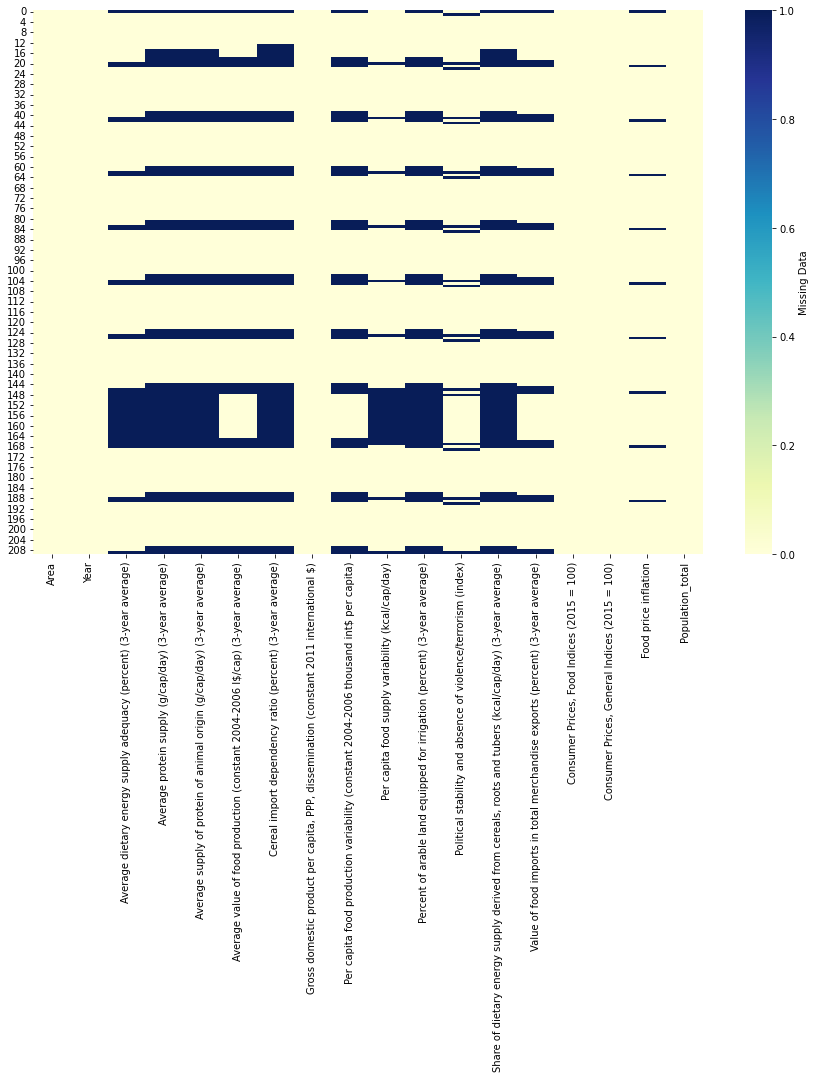

In [24]:
# Visualizing Missing Data using Seaborn heatmap()
plt.figure(figsize=(15,10))
sns.heatmap(df.isna(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

### 2.2 Imputation of missing data

#### Step 1: Test correlation between complete columns and incomplete columns

***Convert string variables into categorical numeric variables***

In [25]:
# create a categorical numeric variable to result 'Area' into groups
df['Area_cat'] = df['Area'].astype('category')
df['Area_cat'] = df['Area_cat'].cat.codes
# reindex dataset
df = df.reindex(columns = df.columns)
# create df1 with no str variables to test correlation
df1 = df.drop('Area', axis = 1)

#### Step 2: Create and test model

We create a model to impute NAs base on *Seaborn Random Forest Regressor*, using *Mean Square Error* to test model.

***Some introduction of the model:***

     X_train - This includes all independent variables, will be used to train the model.
     
     X_test - The remaining portion of the independent variables from the data which will not be used in the training phase and will be used to make predictions to test the accuracy of the model.
     
     y_train - This is dependent variable which needs to be predicted by this model, including category labels against your independent variables, we need to specify our dependent variable while training/fitting the model.
     
     y_test - This data has category labels for the test data, these labels will be used to test the accuracy between actual and predicted categories.
     
     R squared - is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.—Wiki
     We accept 0.75 as a high r2 score in our project.

In [26]:
# This function is used to test model by R squared score.
def test_model(df):
    import warnings
    warnings.filterwarnings('ignore')     # ignore warning message
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import KFold
    kf = KFold(n_splits = 10, random_state = 42, shuffle = True)    
    incomplete_col = df.loc[:,df.isnull().sum() != 0].columns
    high_r2_score=[]
    low_r2_score=[]
    
    for i in incomplete_col:
        df_missing = df[df[i].isnull()].copy()
        df_filter = df.merge(df_missing,how='outer',indicator=True).query('_merge == "left_only"').drop('_merge',1).copy()
        y_pred_rf = []
        y_true_rf = []
        features = df.loc[:,df.isnull().sum() == 0].columns
        for train_index,test_index in kf.split(df_filter):
            df_test = df_filter.iloc[test_index]
            df_train = df_filter.iloc[train_index]
            X_train = np.array(df_train[features])     
            y_train = np.array(df_train[i])            
            X_test = np.array(df_test[features])     
            y_test = np.array(df_test[i])        
            model = RandomForestRegressor(n_estimators = 100, max_depth = 10, random_state = 42)
            model.fit(X_train,y_train)     
            y_pred_rf.append(model.predict(X_test)[0])
            y_true_rf.append(y_test[0])
        if r2_score(y_true_rf, y_pred_rf, sample_weight=None, multioutput='uniform_average') > 0.75:
            high_r2_score.append(i)
        else:
            low_r2_score.append(i)
    return high_r2_score,low_r2_score
high_r2_score = test_model(df1)[0]
low_r2_score = test_model(df1)[1]

In [27]:
print('These are vars with high R squared score:')
for i in high_r2_score:
    print(i)

These are vars with high R squared score:
Average dietary energy supply adequacy (percent) (3-year average)
Average protein supply (g/cap/day) (3-year average)
Average supply of protein of animal origin (g/cap/day) (3-year average)
Cereal import dependency ratio (percent) (3-year average)
Percent of arable land equipped for irrigation (percent) (3-year average)
Political stability and absence of violence/terrorism (index)
Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)
Value of food imports in total merchandise exports (percent) (3-year average)


In [28]:
print('These are vars with low R squared score:')
for i in low_r2_score:
    print(i)

These are vars with low R squared score:
Average value of food production (constant 2004-2006 I$/cap) (3-year average)
Per capita food production variability (constant 2004-2006 thousand int$ per capita)
Per capita food supply variability (kcal/cap/day)
Food price inflation


As shown above, the model performs good for most incomplete variables, while for others it has a low r2 score. For vars with low r2 score, I plan to use mean by Area to impute the NaNs for those have small missing values, and delete the vars which have large missing part.

#### Step 3: Deal with variables which have a low R squared score

***Drop vars which has large missing part***

In [29]:
df2 = df1.copy()
var_to_drop = []
for i in low_r2_score:
    if df2[i].isnull().sum() > 60:
        var_to_drop.append(i)
print('dropped vars:',var_to_drop)
for var in var_to_drop:
    df2.__delitem__(var)

dropped vars: []


***Impute NAs by Area mean for other vars***

In [30]:
var_impute_mean = list(set(low_r2_score) - set(var_to_drop))
for var in var_impute_mean:
    df2[var].fillna(df2.groupby('Area_cat')[var].transform('mean'))

#### Step 4: Impute NaNs using Random Forest Regressor model (for vars with high R squared score)

In [31]:
def Impute_NA(df):
    import warnings
    warnings.filterwarnings('ignore')
    from sklearn.ensemble import RandomForestRegressor
    incomplete_col = df.loc[:,df.isnull().sum() != 0].columns
    for i in incomplete_col:
        df_missing = df[df[i].isnull()].copy()
        df_filter = df.merge(df_missing,how='outer',indicator=True).query('_merge == "left_only"').drop('_merge',1).copy()
        features = features = df.loc[:,df.isnull().sum() == 0].columns
        X_test = np.array(df_missing[features])
        X_train = np.array(df_filter[features])
        y_train = np.array(df_filter[i])
        model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)   #set model attribute
        model.fit(X_train,y_train)            # fit model according to complete train set
        y_test = model.predict(X_test)      # predict NAs
        df.loc[df[i].isnull(),i] = y_test      # impute NAs
    return df
Impute_NA(df2)

Year  Average dietary energy supply adequacy (percent) (3-year average)  \
0    2000                                             123.41                   
1    2001                                             123.00                   
2    2002                                             125.00                   
3    2003                                             127.00                   
4    2004                                             127.00                   
..    ...                                                ...                   
205  2016                                             125.00                   
206  2017                                             126.00                   
207  2018                                             127.00                   
208  2019                                             127.00                   
209  2020                                             125.15                   

     Average protein supply (g/cap/day) (3-year average)  \
0                                            84.842198     
1                                            87.400000     
2                                            89.700000     
3                                            90.300000     
4                                            88.600000     
..                                                 ...     
205                                          94.300000     
206                                          96.000000     
207                                          93.537000     
208                                          93.160000     
209                                          93.086000     

     Average supply of protein of animal origin (g/cap/day) (3-year average)  \
0                                               45.536                         
1                                               45.400                         
2                                               47.700                         
3                                               48.300                         
4                                               47.300                         
..                                                 ...                         
205                                             37.300                         
206                                             37.700                         
207                                             37.284                         
208                                             37.827                         
209                                             37.830                         

     Average value of food production (constant 2004-2006 I$/cap) (3-year average)  \
0                                                83.48                               
1                                                81.00                               
2                                                85.00                               
3                                                86.00                               
4                                                76.00                               
..                                                 ...                               
205                                             201.00                               
206                                              99.00                               
207                                             105.41                               
208                                             100.26                               
209                                             102.22                               

     Cereal import dependency ratio (percent) (3-year average)  \
0                                               91.125           
1                                              100.000           
2                                               99.600           
3                                               95.700           

***Count NaNs after imputation***

In [32]:
df2.isnull().sum().sum()

0

***Add 'Area' column back to cleaned dataset***

In [33]:
df_Area = pd.DataFrame(df.iloc[:,0])
df_cleaned = df_Area.join(df2)
df_cleaned.head()

Area  Year  \
0  Brunei Darussalam  2000   
1  Brunei Darussalam  2001   
2  Brunei Darussalam  2002   
3  Brunei Darussalam  2003   
4  Brunei Darussalam  2004   

   Average dietary energy supply adequacy (percent) (3-year average)  \
0                                             123.41                   
1                                             123.00                   
2                                             125.00                   
3                                             127.00                   
4                                             127.00                   

   Average protein supply (g/cap/day) (3-year average)  \
0                                          84.842198     
1                                          87.400000     
2                                          89.700000     
3                                          90.300000     
4                                          88.600000     

   Average supply of protein of animal origin (g/cap/day) (3-year average)  \
0                                             45.536                         
1                                             45.400                         
2                                             47.700                         
3                                             48.300                         
4                                             47.300                         

   Average value of food production (constant 2004-2006 I$/cap) (3-year average)  \
0                                              83.48                               
1                                              81.00                               
2                                              85.00                               
3                                              86.00                               
4                                              76.00                               

   Cereal import dependency ratio (percent) (3-year average)  \
0                                             91.125           
1                                            100.000           
2                                             99.600           
3                                             95.700           
4                                             93.800           

   Gross domestic product per capita, PPP, dissemination (constant 2011 international $)  \
0                                            69022.9                                       
1                                            69483.9                                       
2                                            70771.6                                       
3                                            71483.2                                       
4                                            70616.6                                       

   Per capita food production variability (constant 2004-2006 thousand int$ per capita)  \
0                                          11.344673                                      
1                                           7.500000                                      
2                                           6.900000                                      
3                                           6.700000                                      
4                                           4.200000                                      

   Per capita food supply variability (kcal/cap/day)  \
0                                               51.0   
1                                               63.0   
2                                               31.0   
3                                               40.0   
4                                               59.0   

   Percent of arable land equipped for irrigation (percent) (3-year average)  \
0                                            48.2905                           
1                                            50.0000                           
2                

#### Save data

In [34]:
df_cleaned.to_csv(r'ASEAN_Consumer Price&Food Security Indicators-cleaned.csv',index=False)

## Exploratory Data Analysis

One of the main objectives of this project is to provide useful insight to assist the government to reduce food insecurity risk. There are a few questions have been addressed in this project to help gaining a better understanding on food insecurity and how it relates to other factors such as consumer price and total population. Exploratory Data Analysis is performed to answer these questions with the help of graphical representations and to discover some trends. 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#df = pd.read_csv('ASEAN_Consumer Price&Food Security Indicators-cleaned.csv')
url='https://github.com/Ruixue-Zhang/Data-Analytics-group-assignment/raw/main/cleaning/ASEAN_Consumer%20Price%26Food%20Security%20Indicators-cleaned.csv'
df = pd.read_csv(url)
df.head()

Area  Year  Average dietary energy requirement (kcal/cap/day)  \
0  Brunei Darussalam  2000                                             2323.0   
1  Brunei Darussalam  2001                                             2329.0   
2  Brunei Darussalam  2002                                             2337.0   
3  Brunei Darussalam  2003                                             2345.0   
4  Brunei Darussalam  2004                                             2352.0   

   Average dietary energy supply adequacy (percent) (3-year average)  \
0                                           123.6675                   
1                                           123.0000                   
2                                           125.0000                   
3                                           127.0000                   
4                                           127.0000                   

   Average fat supply (g/cap/day) (3-year average)  \
0                                           79.343   
1                                           75.700   
2                                           78.700   
3                                           81.700   
4                                           81.000   

   Average protein supply (g/cap/day) (3-year average)  \
0                                          87.412667     
1                                          87.400000     
2                                          89.700000     
3                                          90.300000     
4                                          88.600000     

   Average supply of protein of animal origin (g/cap/day) (3-year average)  \
0                                             45.905                         
1                                             45.400                         
2                                             47.700                         
3                                             48.300                         
4                                             47.300                         

   Average value of food production (constant 2004-2006 I$/cap) (3-year average)  \
0                                               84.9                               
1                                               81.0                               
2                                               85.0                               
3                                               86.0                               
4                                               76.0                               

   Cereal import dependency ratio (percent) (3-year average)  \
0                                             96.556           
1                                            100.000           
2                                             99.600           
3                                             95.700           
4                                             93.800           

   Coefficient of variation of habitual caloric consumption distribution (real number)  \
0                                               0.21                                     
1                                               0.21                                     
2                                               0.21                                     
3                                               0.21                                     
4                                               0.21                                     

   ...  Prevalence of obesity in the adult population (18 years and older)  \
0  ...                                                7.2                    
1  ...                                                7.5                    
2  ...                                                7.9                    
3  ...                                                8.2                    
4  ...                                                8.6                    

   Prevalence of severe food insecurity in the total 

In [44]:
# create a copy df for EDA
data=df.copy()
# rename some vars for easier coding
data.rename(columns = {
                       'Gross domestic product per capita, PPP, dissemination (constant 2011 international $)':'GDP_per_capita',
                       'Consumer Prices, General Indices (2015 = 100)':'CPI',
                       'Number of moderately or severely food insecure people (million) (3-year average)':'FI_amount',
                       'Prevalence of severe food insecurity in the total population (percent) (3-year average)':'severe_FIR',
                       'Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average)':'MnS_FIR',
                       'Consumer Prices, Food Indices (2015 = 100)':'FPI',
                       'Prevalence of undernourishment (percent) (3-year average)':'Undernourishment'}, inplace = True)


In [45]:
data.columns

Index(['Area', 'Year', 'ADER', 'ADESA',
       'Average fat supply (g/cap/day) (3-year average)',
       'Average protein supply (g/cap/day) (3-year average)',
       'Average supply of protein of animal origin (g/cap/day) (3-year average)',
       'Average value of food production (constant 2004-2006 I$/cap) (3-year average)',
       'Cereal import dependency ratio (percent) (3-year average)',
       'Coefficient of variation of habitual caloric consumption distribution (real number)',
       'Dietary energy supply used in the estimation of prevalence of undernourishment (kcal/cap/day) (3-year average)',
       'GDP_per_capita',
       'Incidence of caloric losses at retail distribution level (percent)',
       'minDER',
       'Number of children under 5 years affected by wasting (million)',
       'Number of children under 5 years of age who are overweight (modeled estimates) (million)',
       'Stunted_kids', 'FI_amount',
       'Number of newborns with low birthweight (million)',


### Question 1: What are the factors that contributes to the food insecurity in ASEAN countries?
The chart below shows that Dietary energy supply is most correlated with FIR, they are strongest negative correlated, and 16 features also show a moderate correlation between the FIR

In [48]:
rmArea=data.drop('Area', axis=1)
corr={'Feature':[i for i in rmArea.columns],
      'PCC':[rmArea[i].corr(rmArea['MnS_FIR']) for i in rmArea.columns]}
corr=pd.DataFrame(corr)

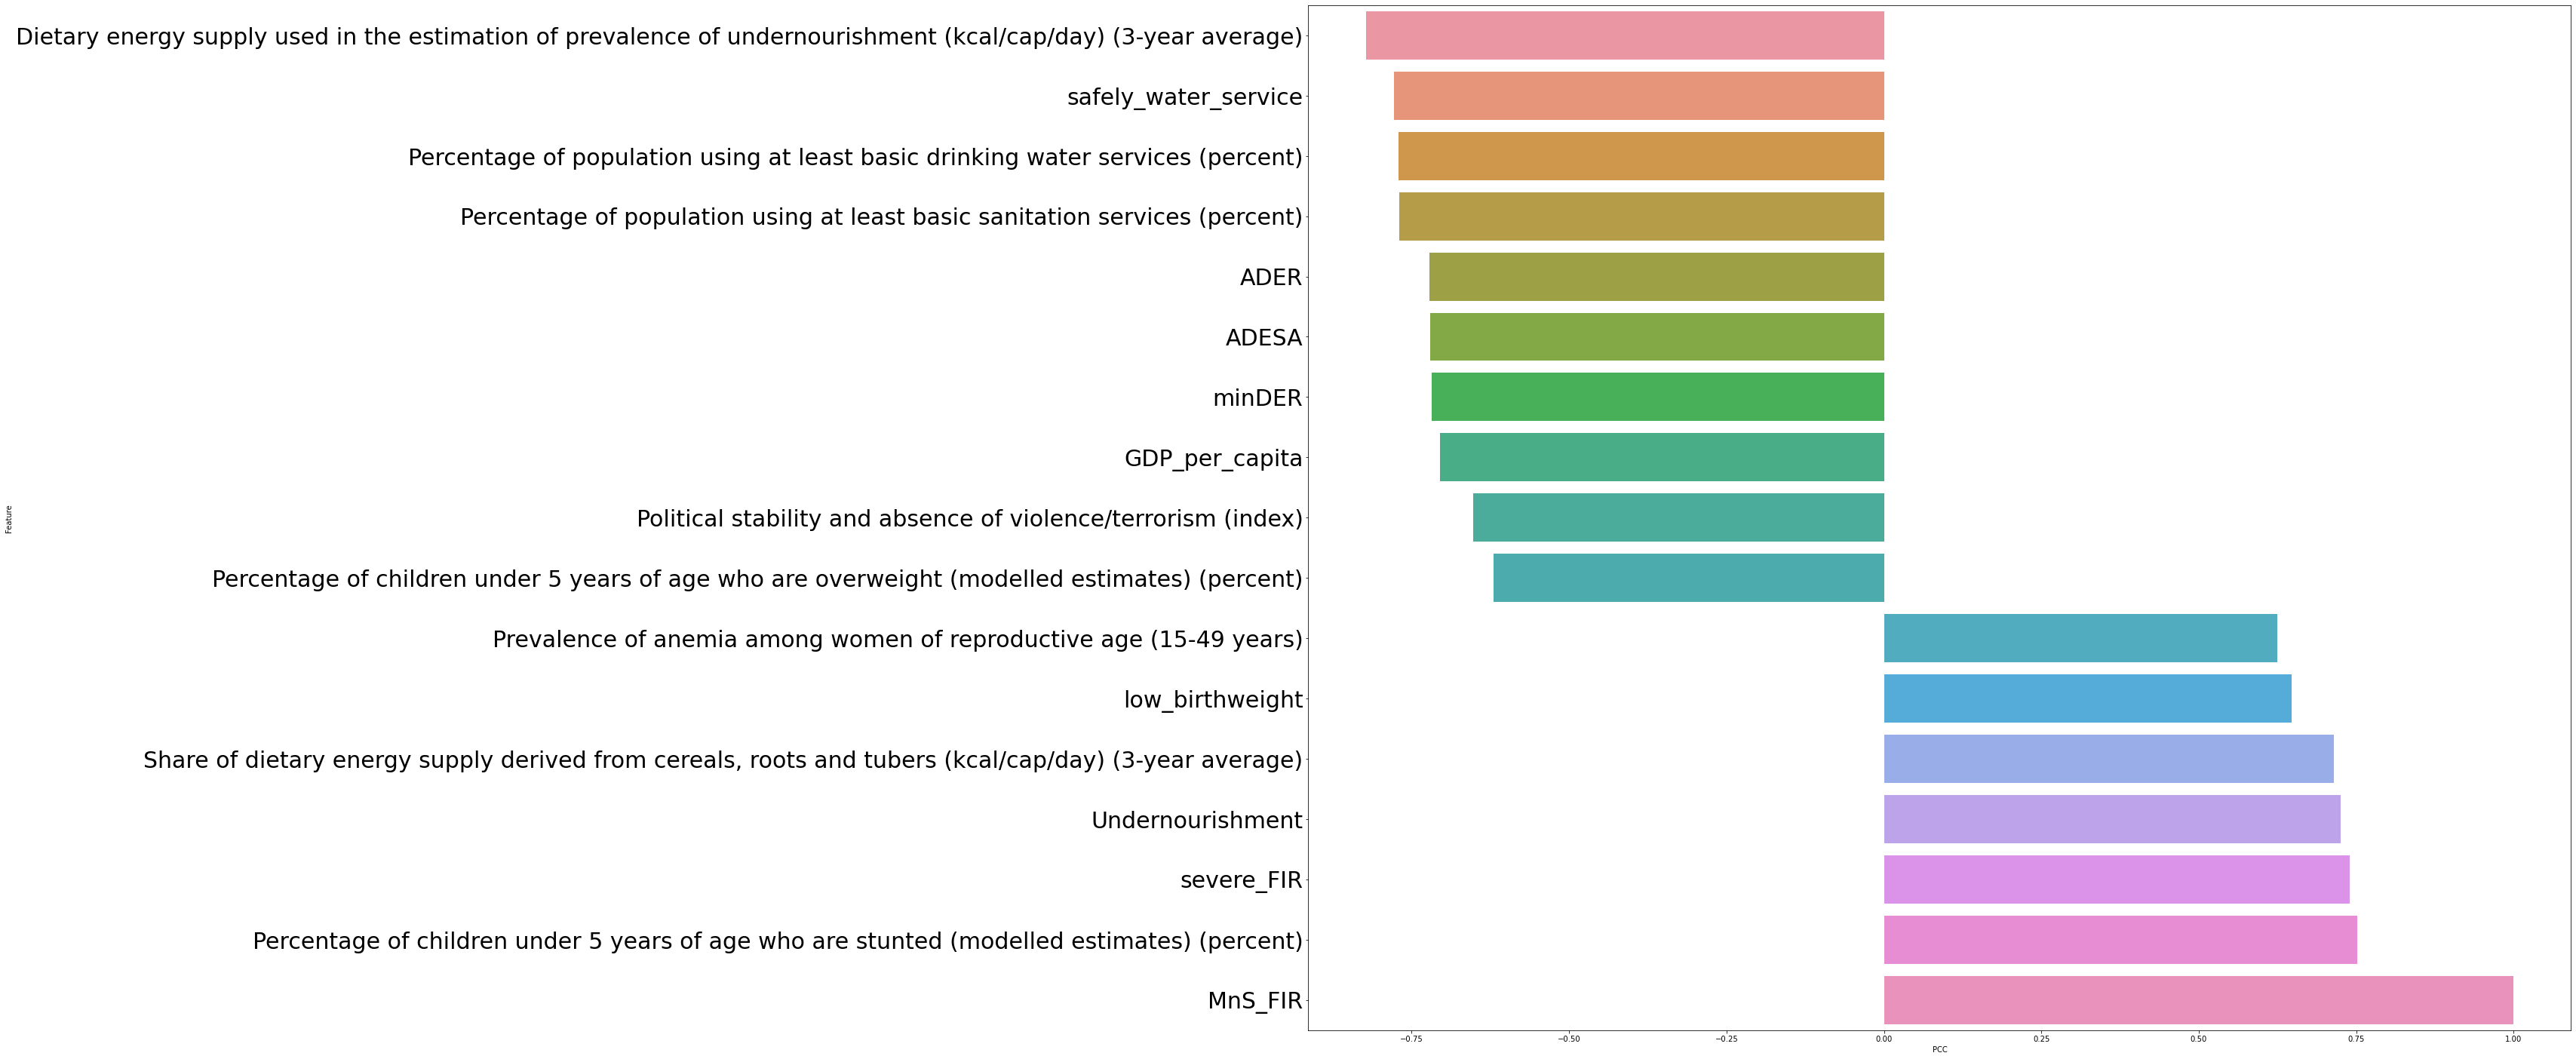

In [49]:
plt.figure(figsize=(30,25))
sns.barplot(x='PCC',y='Feature',data=corr[abs(corr['PCC'])>0.6].sort_values('PCC'),orient = 'h')
plt.yticks(fontsize=30)
plt.show()

### Question 2: What countries that are most vulnerable to food insecurity risk?

- Cambodia has the highest severe FIR over time.
- Singapore always has low FIR.
- The FIR of VietNam and Indonesia go down obviously in these years.

The following plots show how do Severe Food Insecurity Rates/ Moderate&Severe Food Insecurity Rates and Prevelance of Undernourishment change over time of each Asean countries.


(array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

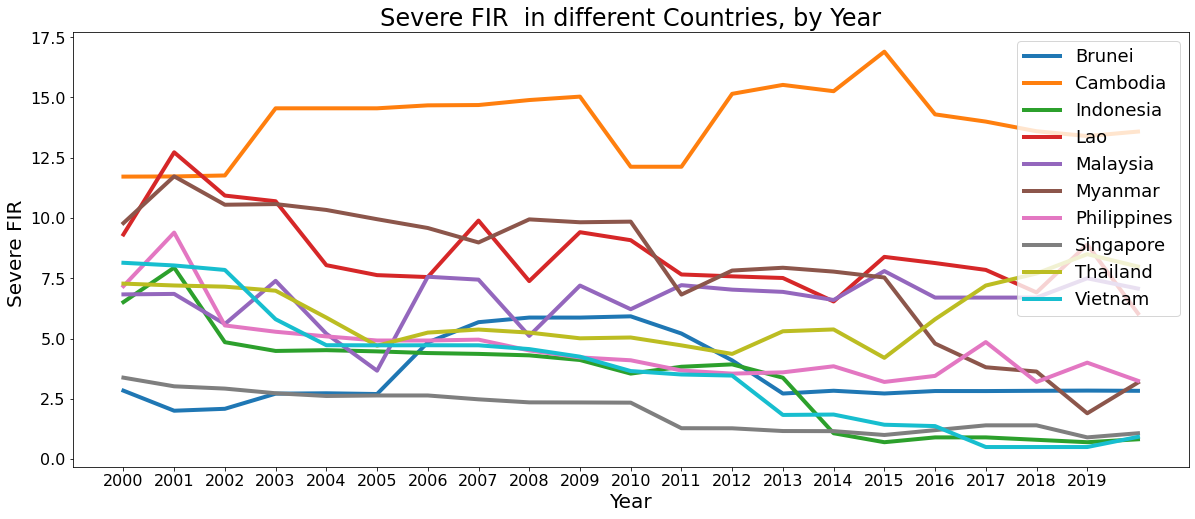

In [50]:
# create df for each country, and group by year
Brunei = data[['severe_FIR','Year']][data['Area']=='Brunei Darussalam'].groupby('Year').mean()
Cambodia = data[['severe_FIR','Year']][data['Area']=='Cambodia'].groupby('Year').mean()
Indonesia = data[['severe_FIR','Year']][data['Area']=='Indonesia'].groupby('Year').mean()
Lao = data[['severe_FIR','Year']][data['Area']=="Lao People's Democratic Republic"].groupby('Year').mean()
Malaysia = data[['severe_FIR','Year']][data['Area']=='Malaysia'].groupby('Year').mean()
Myanmar = data[['severe_FIR','Year']][data['Area']=='Myanmar'].groupby('Year').mean()
Philippines = data[['severe_FIR','Year']][data['Area']=='Philippines'].groupby('Year').mean()
Singapore = data[['severe_FIR','Year']][data['Area']=='Singapore'].groupby('Year').mean()
Thailand = data[['severe_FIR','Year']][data['Area']=='Thailand'].groupby('Year').mean()
Vietnam = data[['severe_FIR','Year']][data['Area']=='Viet Nam'].groupby('Year').mean()
# plot each df in a lineplot
plt.figure(figsize=(20, 8));
ax =sns.lineplot(x= Brunei.index, y= Brunei['severe_FIR'], label='Brunei',linewidth = 4);
ax =sns.lineplot(x= Cambodia.index, y= Cambodia['severe_FIR'], label='Cambodia',linewidth = 4);
ax =sns.lineplot(x= Indonesia.index, y= Indonesia['severe_FIR'], label="Indonesia",linewidth = 4);
ax =sns.lineplot(x= Lao.index, y= Lao['severe_FIR'], label='Lao',linewidth = 4);
ax =sns.lineplot(x= Malaysia.index, y= Malaysia['severe_FIR'], label='Malaysia',linewidth = 4);
ax =sns.lineplot(x= Myanmar.index, y= Myanmar['severe_FIR'], label='Myanmar',linewidth = 4);
ax =sns.lineplot(x= Philippines.index, y= Philippines['severe_FIR'], label='Philippines',linewidth = 4);
ax =sns.lineplot(x= Singapore.index, y= Singapore['severe_FIR'], label='Singapore',linewidth = 4);
ax =sns.lineplot(x= Thailand.index, y= Thailand['severe_FIR'], label='Thailand',linewidth = 4);
ax =sns.lineplot(x= Vietnam.index, y= Vietnam['severe_FIR'], label='Vietnam',linewidth = 4);
ax.set_title("Severe FIR  in different Countries, by Year", fontsize=24);
ax.set_ylabel('Severe FIR ', fontsize=20);
ax.set_xlabel('Year', fontsize=20);
ax.legend(prop=dict(size=18));
plt.xticks(range(2000,2020), fontsize=16);
plt.yticks(fontsize=16)

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

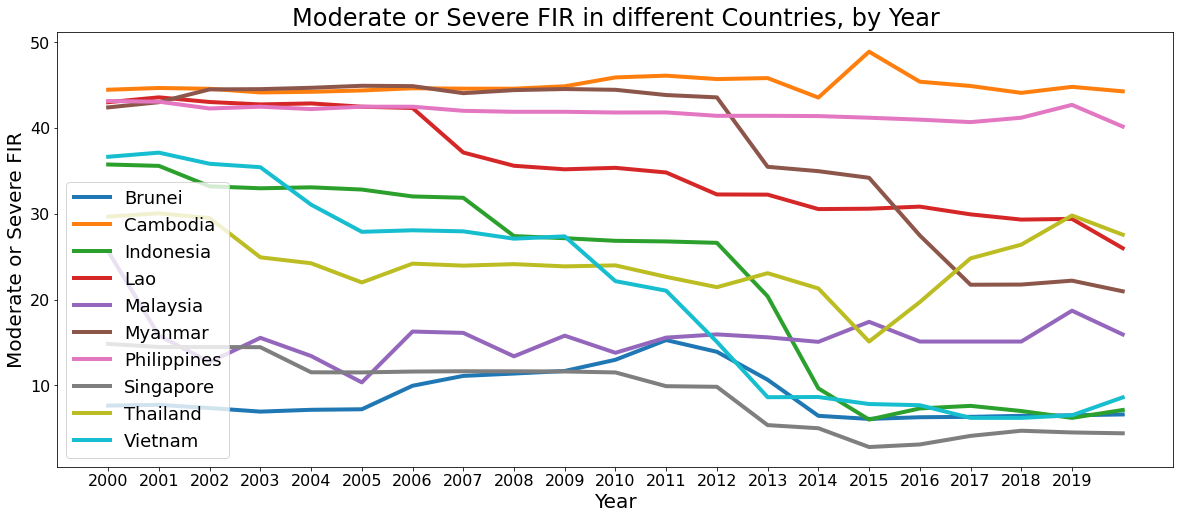

In [51]:
Brunei = data[['MnS_FIR','Year']][data['Area']=='Brunei Darussalam'].groupby('Year').mean()
Cambodia = data[['MnS_FIR','Year']][data['Area']=='Cambodia'].groupby('Year').mean()
Indonesia = data[['MnS_FIR','Year']][data['Area']=='Indonesia'].groupby('Year').mean()
Lao = data[['MnS_FIR','Year']][data['Area']=="Lao People's Democratic Republic"].groupby('Year').mean()
Malaysia = data[['MnS_FIR','Year']][data['Area']=='Malaysia'].groupby('Year').mean()
Myanmar = data[['MnS_FIR','Year']][data['Area']=='Myanmar'].groupby('Year').mean()
Philippines = data[['MnS_FIR','Year']][data['Area']=='Philippines'].groupby('Year').mean()
Singapore = data[['MnS_FIR','Year']][data['Area']=='Singapore'].groupby('Year').mean()
Thailand = data[['MnS_FIR','Year']][data['Area']=='Thailand'].groupby('Year').mean()
Vietnam = data[['MnS_FIR','Year']][data['Area']=='Viet Nam'].groupby('Year').mean()

plt.figure(figsize=(20, 8));
ax =sns.lineplot(x= Brunei.index, y= Brunei['MnS_FIR'], label='Brunei',linewidth = 4);
ax =sns.lineplot(x= Cambodia.index, y= Cambodia['MnS_FIR'], label='Cambodia',linewidth = 4);
ax =sns.lineplot(x= Indonesia.index, y= Indonesia['MnS_FIR'], label="Indonesia",linewidth = 4);
ax =sns.lineplot(x= Lao.index, y= Lao['MnS_FIR'], label='Lao',linewidth = 4);
ax =sns.lineplot(x= Malaysia.index, y= Malaysia['MnS_FIR'], label='Malaysia',linewidth = 4);
ax =sns.lineplot(x= Myanmar.index, y= Myanmar['MnS_FIR'], label='Myanmar',linewidth = 4);
ax =sns.lineplot(x= Philippines.index, y= Philippines['MnS_FIR'], label='Philippines',linewidth = 4);
ax =sns.lineplot(x= Singapore.index, y= Singapore['MnS_FIR'], label='Singapore',linewidth = 4);
ax =sns.lineplot(x= Thailand.index, y= Thailand['MnS_FIR'], label='Thailand',linewidth = 4);
ax =sns.lineplot(x= Vietnam.index, y= Vietnam['MnS_FIR'], label='Vietnam',linewidth = 4);
ax.set_title("Moderate or Severe FIR in different Countries, by Year", fontsize=24);
ax.set_ylabel('Moderate or Severe FIR', fontsize=20);
ax.set_xlabel('Year', fontsize=20);
ax.legend(prop=dict(size=18));
plt.xticks(range(2000,2020), fontsize=16);
plt.yticks(fontsize=16)

<AxesSubplot:title={'center':'Severe Food Insecurity Rates 2020 in Asean Countries'}, ylabel='Area'>

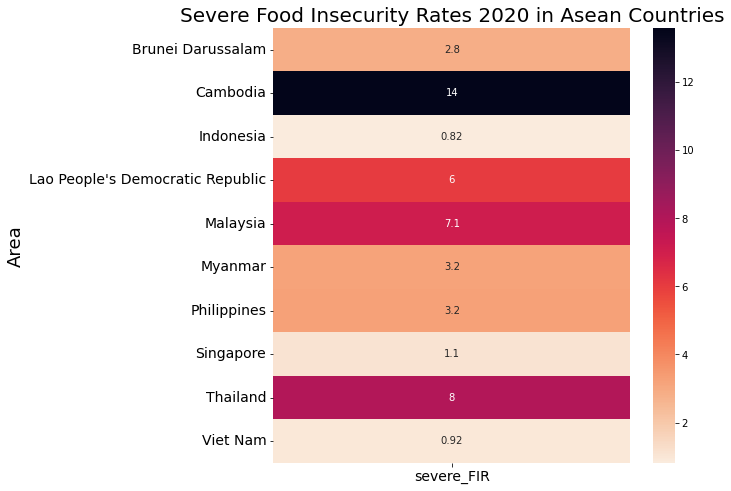

In [52]:
# Create dataframe of 5 random cities
a = data[['Area','severe_FIR']][data['Year']==2020]
a = a.set_index('Area')[['severe_FIR']]
# make heatmap with most variant features
plt.figure(figsize=(8, 8));
plt.title('Severe Food Insecurity Rates 2020 in Asean Countries', fontsize=20);
ax.set_ylim(-20, 20);
plt.xlabel('severe_FIR', fontdict={'fontsize':18});
plt.ylabel('Country', fontdict={'fontsize':18});
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
sns.heatmap(a, annot=True, cmap='rocket_r')

### Question 3: What are the relationship between food insecurity prevalence and other factors such as population size and food prices?

As seen on scatter plots below, the result show that
- In Brunei and Thailand, food price has a positive correlation between food insecurity population.
- In Cambodia, Lao, Malaysia, Myanmar and Singapore, food price has a negative correlation between food insecurity population.
- In most Asean countries, population is negative correlated to food insecurity.

In [53]:
# pip install plotly
from plotly import express as px
fig = px.scatter(data, title = "Food Prices", x="FPI", y="FI_amount", facet_col="Area", facet_col_wrap=5)
fig.show()
data.groupby('Area')[['FPI','FI_amount']].corr().unstack().iloc[:,1]

Area
Brunei Darussalam                   0.875616
Cambodia                           -0.840529
Indonesia                           0.002204
Lao People's Democratic Republic   -0.709464
Malaysia                           -0.662469
Myanmar                            -0.821074
Philippines                         0.312165
Singapore                          -0.859986
Thailand                            0.796697
Viet Nam                           -0.266782
Name: (FPI, FI_amount), dtype: float64

In [54]:
# pip install plotly
from plotly import express as px
fig = px.scatter(data, title = 'Population Total', x="Population_total", y="FI_amount", facet_col="Area", facet_col_wrap=5)
fig.show()
data.groupby('Area')[['Population_total','severe_FIR']].corr().unstack().iloc[:,1]

Area
Brunei Darussalam                  -0.018749
Cambodia                            0.315097
Indonesia                          -0.926095
Lao People's Democratic Republic   -0.632213
Malaysia                            0.324635
Myanmar                            -0.901304
Philippines                        -0.767080
Singapore                          -0.947026
Thailand                            0.011207
Viet Nam                           -0.962148
Name: (Population_total, severe_FIR), dtype: float64

## Feature Selection - with Lasso Regression
Before modeling process, feature selection was performed by using lasso regression to reduce the number of input variables and improves the model performances. As a result, 16 out of 32 variables were selected by lasso regression model.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
import warnings
warnings.filterwarnings('ignore')

In [13]:
# Remove duplicated features and indicators which are same with target
X = df.drop(['Number of moderately or severely food insecure people (million) (3-year average)',
             'Prevalence of undernourishment (percent) (3-year average)',
             'Number of people undernourished (million) (3-year average)',
             'Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average)',
             'Prevalence of severe food insecurity in the total population (percent) (3-year average)',
             'Number of moderately or severely food insecure people (million) (3-year average)',
             'Average dietary energy requirement (kcal/cap/day)',
             'Number of children under 5 years affected by wasting (million)',
             'Number of children under 5 years of age who are overweight (modeled estimates) (million)',
             'Number of obese adults (18 years and older) (million)',
             'Number of newborns with low birthweight (million)',
             'Area', 'Area_cat'], axis = 1) #independent variable
y = df['Prevalence of severe food insecurity in the total population (percent) (3-year average)'] #dependent variable 

X.shape, y.shape

((210, 33), (210,))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

In [15]:
pipeline = Pipeline ([
    ('scaler', StandardScaler()),
    ('model', Lasso())
])

In [16]:
search = GridSearchCV(pipeline,
                     {'model__alpha':np.arange(0.1,3,0.1)},
                     cv = 10, 
                     scoring = 'neg_mean_squared_error',
                     verbose = 3)

In [17]:
search.fit(X_train, y_train)

Fitting 10 folds for each of 29 candidates, totalling 290 fits
[CV 1/10] END ................model__alpha=0.1;, score=-1.108 total time=   0.0s
[CV 2/10] END ................model__alpha=0.1;, score=-2.558 total time=   0.0s
[CV 3/10] END ................model__alpha=0.1;, score=-2.489 total time=   0.0s
[CV 4/10] END ................model__alpha=0.1;, score=-0.559 total time=   0.0s
[CV 5/10] END ................model__alpha=0.1;, score=-1.579 total time=   0.0s
[CV 6/10] END ................model__alpha=0.1;, score=-1.123 total time=   0.0s
[CV 7/10] END ................model__alpha=0.1;, score=-1.086 total time=   0.0s
[CV 8/10] END ................model__alpha=0.1;, score=-0.942 total time=   0.0s
[CV 9/10] END ................model__alpha=0.1;, score=-0.815 total time=   0.0s
[CV 10/10] END ...............model__alpha=0.1;, score=-1.565 total time=   0.0s
[CV 1/10] END ................model__alpha=0.2;, score=-1.838 total time=   0.0s
[CV 2/10] END ................model__alpha=0.2

[CV 6/10] END ................model__alpha=1.1;, score=-4.228 total time=   0.0s
[CV 7/10] END ................model__alpha=1.1;, score=-3.560 total time=   0.0s
[CV 8/10] END ................model__alpha=1.1;, score=-2.548 total time=   0.0s
[CV 9/10] END ................model__alpha=1.1;, score=-4.635 total time=   0.0s
[CV 10/10] END ...............model__alpha=1.1;, score=-2.494 total time=   0.0s
[CV 1/10] END .model__alpha=1.2000000000000002;, score=-8.039 total time=   0.0s
[CV 2/10] END .model__alpha=1.2000000000000002;, score=-8.450 total time=   0.0s
[CV 3/10] END model__alpha=1.2000000000000002;, score=-13.041 total time=   0.0s
[CV 4/10] END .model__alpha=1.2000000000000002;, score=-3.361 total time=   0.0s
[CV 5/10] END .model__alpha=1.2000000000000002;, score=-7.025 total time=   0.0s
[CV 6/10] END .model__alpha=1.2000000000000002;, score=-4.489 total time=   0.0s
[CV 7/10] END .model__alpha=1.2000000000000002;, score=-3.823 total time=   0.0s
[CV 8/10] END .model__alpha=

[CV 10/10] END ...............model__alpha=2.2;, score=-4.638 total time=   0.0s
[CV 1/10] END model__alpha=2.3000000000000003;, score=-14.837 total time=   0.0s
[CV 2/10] END model__alpha=2.3000000000000003;, score=-11.762 total time=   0.0s
[CV 3/10] END model__alpha=2.3000000000000003;, score=-22.736 total time=   0.0s
[CV 4/10] END .model__alpha=2.3000000000000003;, score=-7.411 total time=   0.0s
[CV 5/10] END model__alpha=2.3000000000000003;, score=-13.980 total time=   0.0s
[CV 6/10] END .model__alpha=2.3000000000000003;, score=-8.993 total time=   0.0s
[CV 7/10] END .model__alpha=2.3000000000000003;, score=-6.051 total time=   0.0s
[CV 8/10] END .model__alpha=2.3000000000000003;, score=-6.295 total time=   0.0s
[CV 9/10] END model__alpha=2.3000000000000003;, score=-12.382 total time=   0.0s
[CV 10/10] END model__alpha=2.3000000000000003;, score=-4.844 total time=   0.0s
[CV 1/10] END model__alpha=2.4000000000000004;, score=-15.486 total time=   0.0s
[CV 2/10] END model__alpha=2

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [18]:
search.best_params_

{'model__alpha': 0.1}

In [19]:
coef = search.best_estimator_[1].coef_

In [20]:
[coef !=0]

[array([False, False, False, False, False,  True,  True, False, False,
        False,  True, False, False, False,  True,  True,  True,  True,
        False,  True,  True,  True, False,  True,  True, False, False,
         True,  True, False,  True, False, False])]

In [21]:
#Selected Features by Lasso Feature Selection 
X.columns[coef != 0]

Index(['Average value of food production (constant 2004-2006 I$/cap) (3-year average)',
       'Cereal import dependency ratio (percent) (3-year average)',
       'Incidence of caloric losses at retail distribution level (percent)',
       'Per capita food production variability (constant 2004-2006 thousand int$ per capita)',
       'Per capita food supply variability (kcal/cap/day)',
       'Percent of arable land equipped for irrigation (percent) (3-year average)',
       'Percentage of children under 5 years of age who are overweight (modelled estimates) (percent)',
       'Percentage of population using at least basic drinking water services (percent)',
       'Percentage of population using at least basic sanitation services (percent)',
       'Percentage of population using safely managed drinking water services (Percent)',
       'Political stability and absence of violence/terrorism (index)',
       'Prevalence of anemia among women of reproductive age (15-49 years)',
       'S

In [22]:
#Features discarded by Lasso Feature Selection
X.columns[coef == 0]

Index(['Year',
       'Average dietary energy supply adequacy (percent) (3-year average)',
       'Average fat supply (g/cap/day) (3-year average)',
       'Average protein supply (g/cap/day) (3-year average)',
       'Average supply of protein of animal origin (g/cap/day) (3-year average)',
       'Coefficient of variation of habitual caloric consumption distribution (real number)',
       'Dietary energy supply used in the estimation of prevalence of undernourishment (kcal/cap/day) (3-year average)',
       'Gross domestic product per capita, PPP, dissemination (constant 2011 international $)',
       'Minimum dietary energy requirement  (kcal/cap/day)',
       'Number of children under 5 years of age who are stunted (modeled estimates) (million)',
       'Number of women of reproductive age (15-49 years) affected by anemia (million)',
       'Percentage of children under 5 years of age who are stunted (modelled estimates) (percent)',
       'Percentage of population using safely man

#### Selected Independent Variable 

- Average value of food production (constant 2004-2006 I/cap) (3-year average)
- Cereal import dependency ratio (percent) (3-year average)
- Incidence of caloric losses at retail distribution level (percent)
- Per capita food production variability (constant 2004-2006 thousand int per capita)
- Per capita food supply variability (kcal/cap/day)
- Percent of arable land equipped for irrigation (percent) (3-year average)
- Percentage of children under 5 years of age who are overweight (modelled estimates) (percent)
- Percentage of population using at least basic drinking water services (percent)
- Percentage of population using at least basic sanitation services (percent)
- Percentage of population using safely managed drinking water services (Percent)
- Political stability and absence of violence/terrorism (index)
- Prevalence of anemia among women of reproductive age (15-49 years)
- Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)
- Value of food imports in total merchandise exports (percent) (3-year average)
- Consumer Prices
- General Indices (2015 = 100)

In [23]:
#selected variable correlation
X = df[['Average value of food production (constant 2004-2006 I$/cap) (3-year average)',
       'Cereal import dependency ratio (percent) (3-year average)',
       'Incidence of caloric losses at retail distribution level (percent)',
       'Per capita food production variability (constant 2004-2006 thousand int$ per capita)',
       'Per capita food supply variability (kcal/cap/day)',
       'Percent of arable land equipped for irrigation (percent) (3-year average)',
       'Percentage of children under 5 years of age who are overweight (modelled estimates) (percent)',
       'Percentage of population using at least basic drinking water services (percent)',
       'Percentage of population using at least basic sanitation services (percent)',
       'Percentage of population using safely managed drinking water services (Percent)',
       'Political stability and absence of violence/terrorism (index)',
       'Prevalence of anemia among women of reproductive age (15-49 years)',
       'Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)',
       'Value of food imports in total merchandise exports (percent) (3-year average)',
       'Consumer Prices, General Indices (2015 = 100)']]#independent variable
y = df['Prevalence of severe food insecurity in the total population (percent) (3-year average)'] #dependent variable 

## Correlation 

A correlation matrix is created to visualize the relationship between dependent variable and independent variables. The independent variables that we used for correlation analysis is based on the variables selected by feature selection while Prevalence of severe food insecurity in the total population (percent) (3-year average) variable is used as target variable or dependent variable.

- Based on the correlation analysis, it can be seen that the Prevalence of anemia among women of reproductive age (15-49 years) factor is highly correlated with Prevalence of severe food insecurity in the total population (percent) (3-year average)


In [67]:
# Calculate the correlation between selected variables
cordf = df[['Average value of food production (constant 2004-2006 I$/cap) (3-year average)',
       'Cereal import dependency ratio (percent) (3-year average)',
       'Incidence of caloric losses at retail distribution level (percent)',
       'Per capita food production variability (constant 2004-2006 thousand int$ per capita)',
       'Per capita food supply variability (kcal/cap/day)',
       'Percent of arable land equipped for irrigation (percent) (3-year average)',
       'Percentage of children under 5 years of age who are overweight (modelled estimates) (percent)',
       'Percentage of population using at least basic drinking water services (percent)',
       'Percentage of population using at least basic sanitation services (percent)',
       'Percentage of population using safely managed drinking water services (Percent)',
       'Political stability and absence of violence/terrorism (index)',
       'Prevalence of anemia among women of reproductive age (15-49 years)',
       'Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)',
       'Value of food imports in total merchandise exports (percent) (3-year average)',
       'Consumer Prices, General Indices (2015 = 100)', 'Prevalence of severe food insecurity in the total population (percent) (3-year average)']]
cordf.corr()

Average value of food production (constant 2004-2006 I$/cap) (3-year average)  \
Average value of food production (constant 2004...                                           1.000000                               
Cereal import dependency ratio (percent) (3-yea...                                           0.270882                               
Incidence of caloric losses at retail distribut...                                          -0.208674                               
Per capita food production variability (constan...                                           0.360554                               
Per capita food supply variability (kcal/cap/day)                                           -0.048485                               
Percent of arable land equipped for irrigation ...                                           0.188222                               
Percentage of children under 5 years of age who...                                           0.068371                               
Percentage of population using at least basic d...                                          -0.117195                               
Percentage of population using at least basic s...                                          -0.045777                               
Percentage of population using safely managed d...                                          -0.089575                               
Political stability and absence of violence/ter...                                          -0.394650                               
Prevalence of anemia among women of reproductiv...                                           0.353946                               
Share of dietary energy supply derived from cer...                                           0.194870                               
Value of food imports in total merchandise expo...                                           0.057903                               
Consumer Prices, General Indices (2015 = 100)                                               -0.162150                               
Prevalence of severe food insecurity in the tot...                                           0.316496                               

                                                    Cereal import dependency ratio (percent) (3-year average)  \
Average value of food production (constant 2004...                                           0.270882           
Cereal import dependency ratio (percent) (3-yea...                                           1.000000           
Incidence of caloric losses at retail distribut...                                           0.053789           
Per capita food production variability (constan...                                           0.087504           
Per capita food supply variability (kcal/cap/day)                                            0.202121           
Percent of arable land equipped for irrigation ...                                           0.132145           
Percentage of children under 5 years of age who...                                           0.035317           
Percentage of population using at least basic d...                                           0.031468           
Percentage of population using at least basic s...                                           0.002337           
Percentage of population using safely managed d...                                           0.000999           
Political stability and absence of violence/ter...                                          -0.000009           
Prevalence of anemia among women of reproductiv...                                           0.156991           
Share of dietary energy supply derived from cer...                                           0.113672           
Value of food imports in total merchandise expo...                                           0.041247           
Consumer Prices, General Indices (2015 = 100)                                                0.

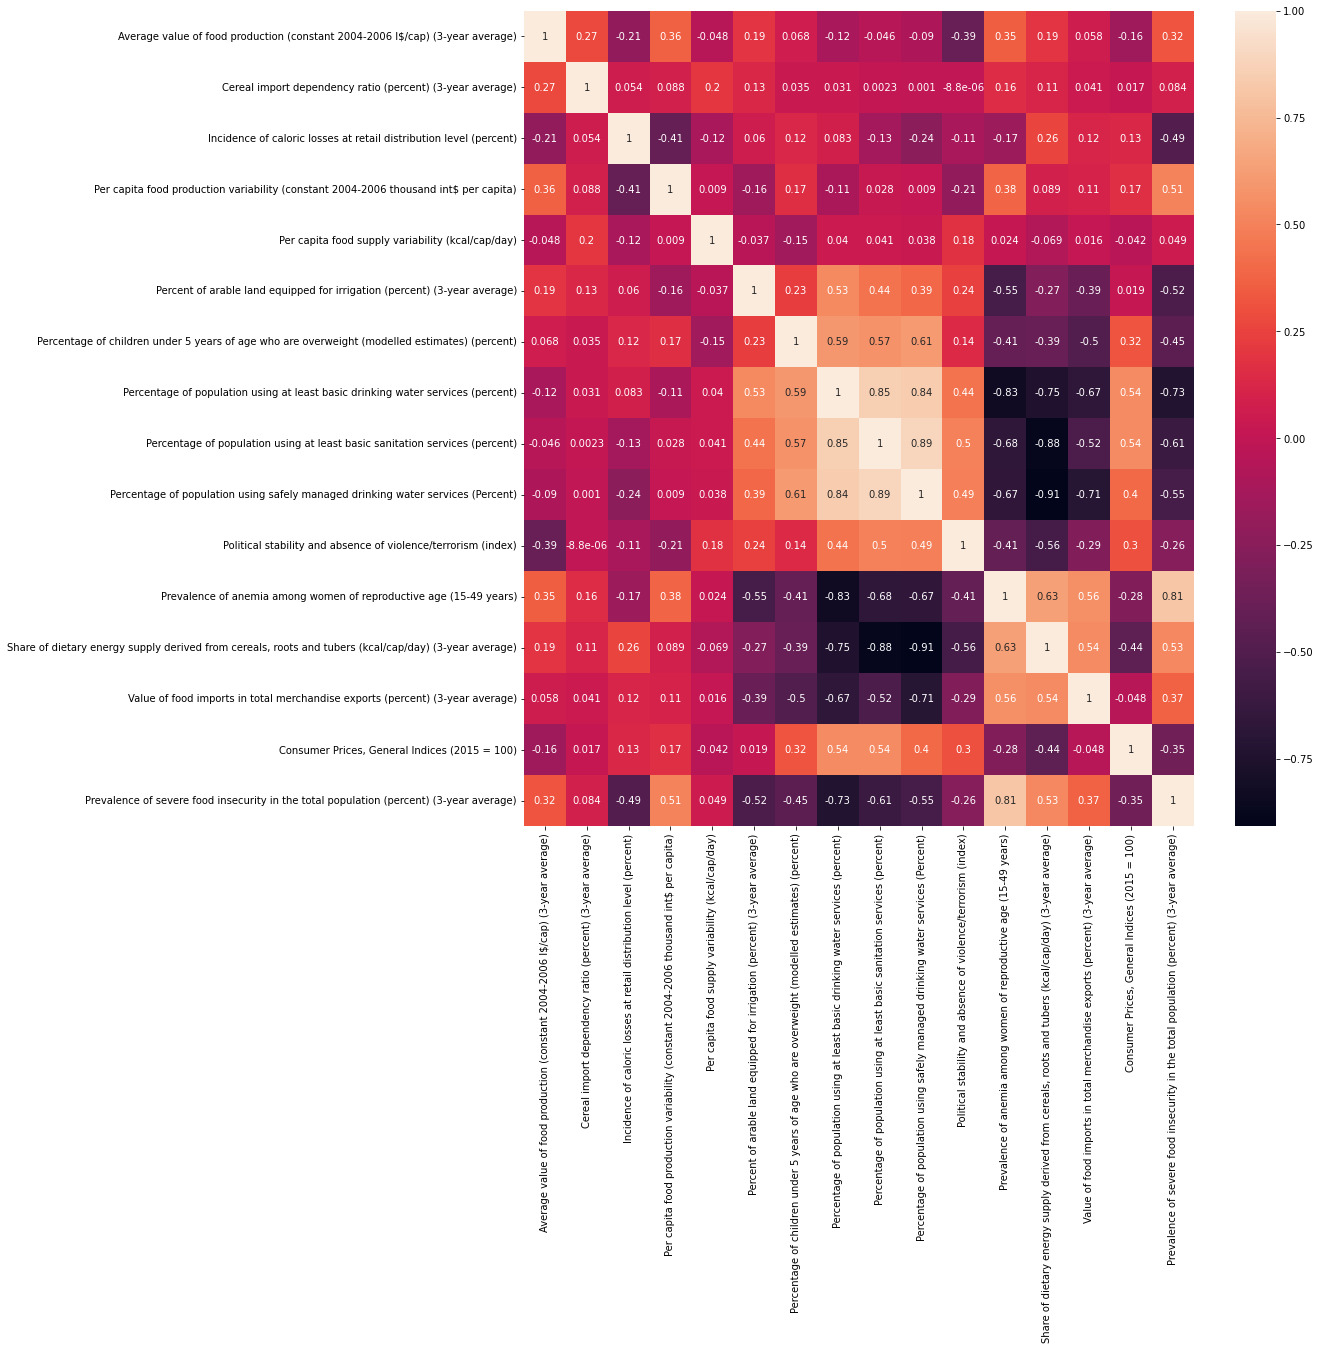

In [68]:
#Visualise the correlation using heatmap
import seaborn as sns
plt.figure(figsize=(15, 15))
sns.heatmap(cordf.corr(), cbar=True, annot = True)
plt.show()

# Modeling

The modeling process used final cleaned dataset with selected features from feature selection. The features used for modeling are as follows:-

- Average value of food production (constant 2004-2006 I/cap) (3-year average)
- Cereal Cereal import dependency ratio (percent) (3-year average)
- Incidence of caloric losses at retail distribution level (percent)
- Per capita food production variability (constant 2004-2006 thousand int per capita)
- Per capita food supply variability (kcal/cap/day)
- Percent of arable land equipped for irrigation (percent) (3-year average)
- Percentage of children under 5 years of age who are overweight (modelled estimates) (percent)
- Percentage of population using at least basic drinking water services (percent)
- Percentage of population using at least basic sanitation services (percent)
- Percentage of population using safely managed drinking water services (Percent)
- Political stability and absence of violence/terrorism (index)
- Prevalence of anemia among women of reproductive age (15-49 years)
- Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)
- Value of food imports in total merchandise exports (percent) (3-year average)
- Consumer Prices, General Indices (2015 = 100)

Target variable/indicator: Prevalence of severe food insecurity in the total population (percent) (3-year average)

Four supervised machine learning used in this project are
- Simple Linear Regression
- Lasso Regression
- Multiple Linear Regression
- Random Forest Regression


## Model 1. Simple Linear Regression

In Simple Linear Regression, only one independent variable is required and therefore the Prevalence of anemia among women of reproductive age (15-49 years) is chosen as independent variable because it has the highest correlation with the dependent variable which is the Prevalence of severe food insecurity in the total population (percent) (3-year average) that also acts as the predictor.

In [70]:
#Creating X and Y
x = np.array(df['Prevalence of anemia among women of reproductive age (15-49 years)']) #independent variable with the highest correlation with independence variable
y = np.array(df['Prevalence of severe food insecurity in the total population (percent) (3-year average)']) #dependent variable
x = x.reshape(-1, 1)

In [71]:
# Splitting the dataset as training and testing
from sklearn.model_selection import train_test_split
x_train_slr, x_test_slr, y_train_slr, y_test_slr = train_test_split(x, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 123)
#Adding additional column to train and test data
#x_train_slr = x_train_slr.values.reshape(-1,1)
#x_test_slr = x_test_slr.values.reshape(-1,1)

In [72]:
#Creating model and fitting data
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(x_train_slr, y_train_slr)

In [73]:
#Intercept value
print(f"intercept: {model.intercept_}")

#Slope value
print(f"slope: {model.coef_}")


intercept: -1.4306090919808359
slope: [0.26362882]


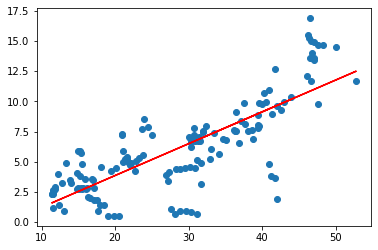

In [74]:
#Visualing regression line
plt.scatter(x_train_slr, y_train_slr)
plt.plot(x_train_slr, -1.431 + 0.264*x_train_slr, 'r')
plt.show()

In [75]:
# Predicting the trains set and test set
y_train_pred_slr = lm.predict(x_train_slr)
y_test_pred_slr = lm.predict(x_test_slr)

## Model 2. Lasso Regression

In [78]:
from sklearn.linear_model import LinearRegression
ls = Lasso(alpha = 1.0)

In [79]:
X_train_mls, X_test_mls, y_train_mls, y_test_mls = train_test_split(X,y, test_size = 0.3, random_state=123)

In [80]:
#Create and fit the model

ls.fit(X_train_mls,y_train_mls)

Lasso()

In [81]:
# Predicting the trains set and test set
y_train_pred_mls = ls.predict(X_train_mls)
y_test_pred_mls = ls.predict(X_test_mls)


## Model 3. Multiple Linear Regression

In [82]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [83]:
X_train_mlr, X_test_mlr, y_train_mlr, y_test_mlr = train_test_split(X,y, test_size = 0.3, random_state=123)

In [84]:
# fit model
lin_reg.fit(X_train_mlr, y_train_mlr)

LinearRegression()

In [85]:
y_pred_mlr = lin_reg.predict(X_test_mlr)

In [86]:
lin_reg.coef_

array([ 0.00477662,  0.00422371, -3.86847278,  0.20583462, -0.00933289,
       -0.06335423, -0.13600561, -0.00640486, -0.02942688, -0.04344749,
        0.97628631,  0.0604896 ,  0.02229857, -0.15092549, -0.0070122 ])

In [87]:
test_residuals = y_test_mlr - y_pred_mlr

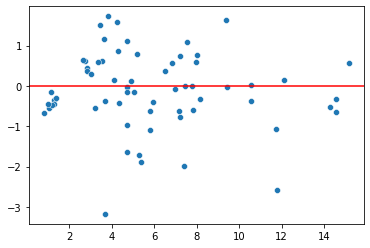

In [88]:
#test_residuals 
sns.scatterplot(x=y_test_mlr, y=test_residuals)
plt.axhline(y=0, color = 'red')

## Model 4. Random Forest Regression

In [89]:
#import random forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
regressor = RandomForestRegressor()

In [90]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X,y, test_size = 0.3, random_state=123)

In [91]:
regressor.fit(X_train_rf, y_train_rf)
y_pred_rf = regressor.predict(X_test_rf)

In [92]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

r2_rf = r2_score(y_test_rf,y_pred_rf)
rmse_rf = mean_squared_error(y_test_rf, y_pred_rf, squared = False)
print('R square test data:', r2_rf)
print('The RMSE value of test data:', rmse_rf)

R square test data: 0.948308994741128
The RMSE value of test data: 0.8153548145468711


In [93]:
#plotting learning curves
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=123)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(r2_score(y_train[:m], y_train_predict))
        val_errors.append(r2_score(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

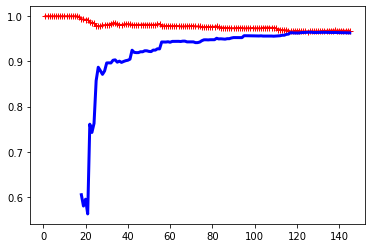

In [94]:
#plotting rf graph
plot_learning_curves(model, X, y)

# Model Evaluation

In this part the R square score and root mean square error (RMSE) for each model are compared to determine which model gives the best performance

### Simple Linear Regression Model Evaluation

In [95]:
# cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits = 5, shuffle = True, random_state = 123)
cvs_lm = cross_val_score(lm, x, y, cv=kf)
print('Cross Validation Scores:',cvs_lm)
print('Average Cross Validation Scores:',cvs_lm.mean())

Cross Validation Scores: [0.79445141 0.61850904 0.63243963 0.68257292 0.53300059]
Average Cross Validation Scores: 0.6521947172579559


In [96]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
r2_slr = r2_score(y_test_slr, y_test_pred_slr)
rmse_slr = mean_squared_error(y_test_slr, y_test_pred_slr, squared = False)
print('R square test data:', r2_slr)
print('The RMSE value of test data :', rmse_slr )

R square test data: 0.7250269939104768
The RMSE value of test data : 1.8805469548293028


###  Lasso Regression Model Evaluation

In [97]:
# cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
cvs_ls = cross_val_score(ls, X, y, cv=kf)
print('Cross Validation Scores:',cvs_ls)
print('Average Cross Validation Score:',cvs_ls.mean())

Cross Validation Scores: [0.80540888 0.79202844 0.74291815 0.77185427 0.74157588]
Average Cross Validation Score: 0.7707571232366568


In [98]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2_mls = r2_score(y_test_mls, y_test_pred_mls)
rmse_mls = mean_squared_error(y_test_mls, y_test_pred_mls, squared = False)
print('R square test data:', r2_mls)
print('The RMSE value of test data:', rmse_mls)

R square test data: 0.8100836454629932
The RMSE value of test data: 1.5628609271594722


### Multiple linear Regression Model Evaluation

In [99]:
# cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
cvs_mlr = cross_val_score(lin_reg, X, y, cv=kf)
print('Cross Validation Scores:',cvs_mlr)
print('Average Cross Validation Score:',cvs_mlr.mean())

Cross Validation Scores: [0.89198839 0.94070616 0.93896261 0.92726947 0.90680825]
Average Cross Validation Score: 0.9211469755285044


In [100]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2_mlr = r2_score(y_test_mlr,y_pred_mlr)
rmse_mlr = mean_squared_error(y_test_mlr, y_pred_mlr, squared = False)
print('R square test data:', r2_mlr)
print('The RMSE value of test data:', rmse_mlr)

R square test data: 0.9277925218019545
The RMSE value of test data: 0.9636742173505807


### Random Forest Regression Model Evaluation

In [101]:
# cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
cvs_rf = cross_val_score(regressor, X, y, cv=kf)
print('Cross Validation Scores:',cvs_rf)
print('Average Cross Validation Score:',cvs_rf.mean())

Cross Validation Scores: [0.96228631 0.97556909 0.95907233 0.92008571 0.9455252 ]
Average Cross Validation Score: 0.9525077285261677


In [102]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2_rf = r2_score(y_test_rf,y_pred_rf)
rmse_rf = mean_squared_error(y_test_rf, y_pred_rf, squared = False)
print('R square test data:', r2_rf)
print('The RMSE value of test data:', rmse_rf)

R square test data: 0.948308994741128
The RMSE value of test data: 0.8153548145468711


### Summary of model evaluation result

In [103]:
r2={
    'Model':['Simple linear regression','Lasso regression','Multiple linear regression','Random forest regression'],
    'R Square Score':[r2_slr, r2_mls, r2_mlr, r2_rf],
    'Root Mean Square Error':[rmse_slr, rmse_mls, rmse_mlr, rmse_rf,],
    'Average CV score':[cvs_lm.mean(), cvs_ls.mean(), cvs_mlr.mean(), cvs_rf.mean()]
}
r2=pd.DataFrame(r2)
r2

Model  R Square Score  Root Mean Square Error  \
0    Simple linear regression        0.725027                1.880547   
1            Lasso regression        0.810084                1.562861   
2  Multiple linear regression        0.927793                0.963674   
3    Random forest regression        0.948309                0.815355   

   Average CV score  
0          0.652195  
1          0.770757  
2          0.921147  
3          0.952508

### Question 4.  Which regression model is the best to predict prevalence of severe food insecurity in the total population (percent) (3-year average) (%) each ASEAN country?  
- Based on the table above, random forest regression has the best performance to predict prevalence of severe food insecurity in the total population (percent) (3-year average) (%) with the highest R square score 0.95 and lowest root mean square error (RMSE) which is 0.81


## Prediction
Model 4 which is Random Forest Model is used to generate prediction for year 2020 for each ASEAN countries

In [104]:
# Generate Prediction
# make a new dataframe for year 2020

df_20 = pd.DataFrame(df[df['Year'] == 2020])
df_20 = df_20[['Area','Average value of food production (constant 2004-2006 I$/cap) (3-year average)',
       'Cereal import dependency ratio (percent) (3-year average)',
       'Incidence of caloric losses at retail distribution level (percent)',
       'Per capita food production variability (constant 2004-2006 thousand int$ per capita)',
       'Per capita food supply variability (kcal/cap/day)',
       'Percent of arable land equipped for irrigation (percent) (3-year average)',
       'Percentage of children under 5 years of age who are overweight (modelled estimates) (percent)',
       'Percentage of population using at least basic drinking water services (percent)',
       'Percentage of population using at least basic sanitation services (percent)',
       'Percentage of population using safely managed drinking water services (Percent)',
       'Political stability and absence of violence/terrorism (index)',
       'Prevalence of anemia among women of reproductive age (15-49 years)',
       'Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)',
       'Value of food imports in total merchandise exports (percent) (3-year average)',
       'Consumer Prices, General Indices (2015 = 100)', 'Prevalence of severe food insecurity in the total population (percent) (3-year average)']]
df_20

Area  \
20                  Brunei Darussalam   
41                           Cambodia   
62                          Indonesia   
83   Lao People's Democratic Republic   
104                          Malaysia   
125                           Myanmar   
146                       Philippines   
167                         Singapore   
188                          Thailand   
209                          Viet Nam   

     Average value of food production (constant 2004-2006 I$/cap) (3-year average)  \
20                                               72.45                               
41                                              124.44                               
62                                              104.13                               
83                                              119.40                               
104                                             227.71                               
125                                             140.53                               
146                                             112.16                               
167                                               7.70                               
188                                             190.86                               
209                                             130.88                               

     Cereal import dependency ratio (percent) (3-year average)  \
20                                          -55.903000           
41                                           -3.940731           
62                                            7.511000           
83                                           -1.551598           
104                                          73.042000           
125                                          -3.523553           
146                                          -1.369500           
167                                         -58.336000           
188                                         -69.448000           
209                                          -1.176000           

     Incidence of caloric losses at retail distribution level (percent)  \
20                                            3.190000                    
41                                            2.900000                    
62                                            3.900000                    
83                                            3.490000                    
104                                           2.860000                    
125                                           3.370000                    
146                                           3.300000                    
167                                           3.174604                    
188                                           2.730000                    
209                                           3.580000                    

     Per capita food production variability (constant 2004-2006 thousand int$ per capita)  \
20                                            3.010833                                      
41                                           14.931478                                      
62                                            7.116894                                      
83                                            8.511611                                      
104                                          11.739914                                      
125                                           6.653939                                      
146                                           6.984433                                      
167                                           1.447582                                      
188                                          23.850000                                      
209                                           6.901667                                      

     Per capita food supply variability (kcal/cap/day)  \

In [105]:
#Creating X and Y

x_20 = df_20[['Average value of food production (constant 2004-2006 I$/cap) (3-year average)',
       'Cereal import dependency ratio (percent) (3-year average)',
       'Incidence of caloric losses at retail distribution level (percent)',
       'Per capita food production variability (constant 2004-2006 thousand int$ per capita)',
       'Per capita food supply variability (kcal/cap/day)',
       'Percent of arable land equipped for irrigation (percent) (3-year average)',
       'Percentage of children under 5 years of age who are overweight (modelled estimates) (percent)',
       'Percentage of population using at least basic drinking water services (percent)',
       'Percentage of population using at least basic sanitation services (percent)',
       'Percentage of population using safely managed drinking water services (Percent)',
       'Political stability and absence of violence/terrorism (index)',
       'Prevalence of anemia among women of reproductive age (15-49 years)',
       'Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)',
       'Value of food imports in total merchandise exports (percent) (3-year average)',
       'Consumer Prices, General Indices (2015 = 100)', 'Prevalence of severe food insecurity in the total population (percent) (3-year average)']]
y_20 = df_20['Prevalence of severe food insecurity in the total population (percent) (3-year average)']

In [106]:
# using random forest model to predict
regressor.fit(x_20, y_20)
preds_2020 = regressor.predict(x_20)
df_preds = pd.concat([df_20.reset_index(), pd.Series(preds_2020)], axis = 1,). rename(columns = {0:'Predicted Prevalence of severe food insecurity in the total population (percent) (3-year average)'})
df_preds[['Area','Prevalence of severe food insecurity in the total population (percent) (3-year average)', 'Predicted Prevalence of severe food insecurity in the total population (percent) (3-year average)']]

Area  \
0                 Brunei Darussalam   
1                          Cambodia   
2                         Indonesia   
3  Lao People's Democratic Republic   
4                          Malaysia   
5                           Myanmar   
6                       Philippines   
7                         Singapore   
8                          Thailand   
9                          Viet Nam   

   Prevalence of severe food insecurity in the total population (percent) (3-year average)  \
0                                              2.832                                         
1                                             13.586                                         
2                                              0.821                                         
3                                              6.042                                         
4                                              7.072                                         
5                                              3.176                                         
6                                              3.247                                         
7                                              1.072                                         
8                                              7.987                                         
9                                              0.921                                         

   Predicted Prevalence of severe food insecurity in the total population (percent) (3-year average)  
0                                            2.70190                                                  
1                                           11.36317                                                  
2                                            1.70957                                                  
3                                            5.82316                                                  
4                                            7.23933                                                  
5                                            3.49438                                                  
6                                            3.05139                                                  
7                                            1.62093                                                  
8                                            7.80986                                                  
9                                            1.61478

In [171]:
# map for predicted value
import plotly
import plotly.express as px
df_map=df_preds[['Area','Prevalence of severe food insecurity in the total population (percent) (3-year average)', 'Predicted Prevalence of severe food insecurity in the total population (percent) (3-year average)']]
fig = px.choropleth(locationmode="country names", center= {'lat':2.21797, 'lon':120}, color=df_map['Prevalence of severe food insecurity in the total population (percent) (3-year average)'].unique(), locations=df_map['Area'].unique(), scope='asia')
 
fig.show()

In [170]:
# map for actual value
fig = px.choropleth(locationmode="country names", center= {'lat':2.21797, 'lon':120}, color=df_map['Predicted Prevalence of severe food insecurity in the total population (percent) (3-year average)'].unique(), locations=df_map['Area'].unique(), scope='asia')
 
fig.show()

## Conclusion

In recent years, food insecurity (FI) has affected an increasing number of countries as a result of COVID-19 and the marginal wars. The current study focuses on food insecurity in various ASEAN countries. 
- Through this study we have managed to identify several important factors that affect food insecurity in ASEAN countries, namely the impact of safely water services, sanitation services, dietary energy supply and GDP. 
- We also found that three countries, Cambodia, Philippines and Lao, are the most vulnerable to food insecurity through the analysis of 10 countries. 
- In addition, we found that the prevalence of food insecurity has a direct impact on food supply and prices in a country, for example, in Brunei and Thailand, food prices are positively correlated with the food insecure population. In Cambodia, Laos, Malaysia, Myanmar and Singapore, food prices are negatively correlated with the food insecure population. So if one wants to improve the size of a country's population  one must first address the issue of food insecurity.
- We have used random forest regression models to accurately predict the food insecurity in ASEAN countries, which can help countries to make decisions to reduce the risk of food insecurity.
- In summary, this study has successfully analysed and predicted the impact of food insecurity (FI) in ASEAN countries, in addition to helping countries other than ASEAN to analyse their own food insecurity and predict food insecurity.

## Future Works

We can extend the area of research to different regions and continents around the globe using the same approaches and methodologies. With this extension we could also explore what are factors that affecting the food insecurity for those countries. 

Besides that, it would be beneficial if the future work could leverage the datasets available in Food and Agriculture Organization such as Production and Food Balances which then can be used in determining or even predict the supply and demand of the food.